### О ЛР:

- Coding Gradient boosting

----

#### Самостоятельная оценка результатов

Для удобства проверки, исходя из набора решенных задач, посчитайте свою максимальную оценку (Она тут равняется 6).

**Оценка**: 5

***DeadLine - 09.01.2025 23:59***

### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание. Иначе задание не проверяется.

In [1]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split


sns.set(style="darkgrid")
filterwarnings("ignore")

In [2]:
x = load_npz("x.npz")
y = np.load("y.npy")

Разделим на обучающую, валидационную и тестовую выборки (`random_state` оставьте равным 666 для воспроизводимости).

In [3]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=666
)

x_test, x_valid, y_test, y_valid = train_test_split(
    x_test, y_test, test_size=0.5, random_state=666
)

x_train.shape, x_valid.shape, x_test.shape

((18825, 169), (2354, 169), (2353, 169))

## Задание 1. Реализация градиентного бустинга [2 балла]

Необходимо дописать код в файле `boosting.py`. Уже создан шаблон класса `Boosting`, который можно модифицировать по своему усмотрению.

### Описание функций:

#### `__init__`

Конструктор класса принимает следующие параметры:

- `base_model_class` — класс базовой модели для бустинга.
- `base_model_params` — словарь гиперпараметров для базовой модели.
- `n_estimators` — количество базовых моделей для обучения.
- `learning_rate` — темп обучения, должен быть в диапазоне (0, 1].
- `subsample` — доля обучающей выборки для тренировки базовой модели (размер бутстрап-выборки относительно исходной).
- `early_stopping_rounds` — число итераций без улучшения на валидационной выборке, после которых обучение прекращается.
- `plot` — флаг для построения графика качества моделей после обучения.

#### `fit`

Метод `fit` принимает обучающую и валидационную выборки.

1. Инициализируем нулевую модель и делаем предсказания (например, все нули) для обеих выборок.
2. Обучаем `n_estimators` базовых моделей:
   - Обучаем новую базовую модель на текущих остатках.
   - Обновляем предсказания на обучающей и валидационной выборках.
   - Рассчитываем ошибки на обеих выборках с помощью `loss_fn`.
   - Проверяем условия для ранней остановки.

3. Если флаг `plot` установлен, строим график качества после обучения всех моделей.

#### `fit_new_base_model`

Метод `fit_new_base_model` принимает обучающую выборку и текущие предсказания для неё.

1. Генерируем бутстрап-выборку.
2. Обучаем базовую модель на этой выборке.
3. Оптимизируем значение гаммы.
4. Добавляем новую базовую модель и гамму в соответствующие списки (учитывая `learning_rate`).

#### `predict_proba`

Метод `predict_proba` принимает выборку для предсказания вероятностей.

1. Суммируем предсказания базовых моделей (учитывая гамму и `learning_rate`).
2. Применяем сигмоидальную функцию для получения вероятностей.

In [4]:
%load_ext autoreload

In [5]:
%autoreload 2

from boosting import Boosting

### Проверка кода

У автора задания всё учится около одной секунды.

In [6]:
boosting = Boosting()

%time boosting.fit(x_train, y_train, x_valid, y_valid)

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(x_test).shape == (x_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

Iteration 1/10: Train Loss = 0.6737, Valid Loss = 0.6754
Iteration 2/10: Train Loss = 0.6553, Valid Loss = 0.6590
Iteration 3/10: Train Loss = 0.6376, Valid Loss = 0.6427
Iteration 4/10: Train Loss = 0.6207, Valid Loss = 0.6274
Iteration 5/10: Train Loss = 0.6046, Valid Loss = 0.6132
Iteration 6/10: Train Loss = 0.5892, Valid Loss = 0.5997
Iteration 7/10: Train Loss = 0.5745, Valid Loss = 0.5869
Iteration 8/10: Train Loss = 0.5605, Valid Loss = 0.5743
Iteration 9/10: Train Loss = 0.5473, Valid Loss = 0.5628
Iteration 10/10: Train Loss = 0.5346, Valid Loss = 0.5515
CPU times: total: 1.11 s
Wall time: 1.18 s
Train ROC-AUC 0.9867
Valid ROC-AUC 0.9493
Test ROC-AUC 0.9440


## Задание 2. Обучение градиентного бустинга [0.5 балла]

Оцените качество вашей реализации градиентного бустинга на тестовой выборке, используя базовые модели — решающие деревья с различной максимальной глубиной. Метрикой будет ROC-AUC.

**Инструкция:**
1. Перебирайте значения максимальной глубины деревьев от 1 до 30 с шагом 2.
2. Оставьте остальные параметры бустинга по умолчанию.
3. Постройте график зависимости качества на обучающей и тестовой выборке от максимальной глубины деревьев.

Iteration 1/10: Train Loss = 0.6819, Valid Loss = 0.6823
Iteration 2/10: Train Loss = 0.6712, Valid Loss = 0.6720
Iteration 3/10: Train Loss = 0.6610, Valid Loss = 0.6623
Iteration 4/10: Train Loss = 0.6512, Valid Loss = 0.6528
Iteration 5/10: Train Loss = 0.6422, Valid Loss = 0.6441
Iteration 6/10: Train Loss = 0.6335, Valid Loss = 0.6357
Iteration 7/10: Train Loss = 0.6252, Valid Loss = 0.6277
Iteration 8/10: Train Loss = 0.6172, Valid Loss = 0.6200
Iteration 9/10: Train Loss = 0.6096, Valid Loss = 0.6127
Iteration 10/10: Train Loss = 0.6023, Valid Loss = 0.6055
Iteration 1/10: Train Loss = 0.6789, Valid Loss = 0.6793
Iteration 2/10: Train Loss = 0.6654, Valid Loss = 0.6662
Iteration 3/10: Train Loss = 0.6524, Valid Loss = 0.6534
Iteration 4/10: Train Loss = 0.6400, Valid Loss = 0.6413
Iteration 5/10: Train Loss = 0.6283, Valid Loss = 0.6297
Iteration 6/10: Train Loss = 0.6169, Valid Loss = 0.6186
Iteration 7/10: Train Loss = 0.6060, Valid Loss = 0.6079
Iteration 8/10: Train Loss = 0

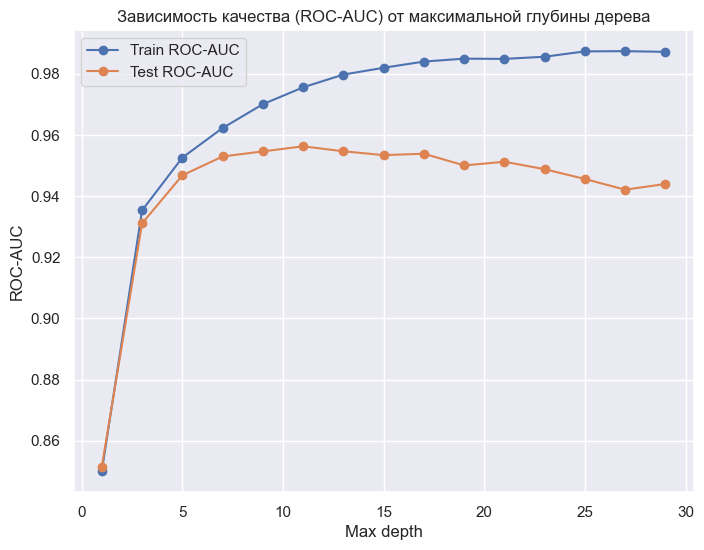

In [7]:
results = {}

depths = range(1, 30, 2)

### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

for d in depths:
    boosting = Boosting(
        base_model_params={'max_depth': d},
        n_estimators=10,
        learning_rate=0.1,
        subsample=0.3,
        early_stopping_rounds=None,
        plot=False
    )

    boosting.fit(x_train, y_train, x_valid, y_valid)

    train_roc_auc = boosting.score(x_train, y_train)
    test_roc_auc = boosting.score(x_test, y_test)

    results[d] = (train_roc_auc, test_roc_auc)

train_scores = [results[d][0] for d in depths]
test_scores = [results[d][1] for d in depths]

plt.figure(figsize=(8, 6))
plt.plot(depths, train_scores, marker='o', label='Train ROC-AUC')
plt.plot(depths, test_scores, marker='o', label='Test ROC-AUC')
plt.xlabel('Max depth')
plt.ylabel('ROC-AUC')
plt.title('Зависимость качества (ROC-AUC) от максимальной глубины дерева')
plt.legend()
plt.show()

**Какая из моделей имеет лучшее качество? Как вы можете это объяснить?**

╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

До глубины в 11 деревья учитывают много нелинейностей и взаимодействий признаков - это хорошо. А дальше, модель будто подстраивается под обучающую выборку - оверфиттинг - это видно по тому, что на тестовой после 11 глубины качество падает.

## Задание 3. Подбор гиперпараметров и поиск оптимальной модели [3 балла]

Настройте основные гиперпараметры вашей модели градиентного бустинга, используя валидационную выборку. Подберите параметры как для самого бустинга, так и для базовых моделей.

**Рекомендации:**
- Используйте библиотеки для автоматизированного подбора гиперпараметров, такие как [Hyperopt](https://github.com/hyperopt/hyperopt) или [Optuna](https://optuna.org/).
- Подберите все основные параметры, чтобы найти лучшую модель на валидационной выборке.

In [8]:
!pip install optuna

   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 2.1/2.1 MB 19.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

import optuna

def objective(trial):
    max_depth = trial.suggest_int("max_depth", 1, 15)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 20)

    n_estimators = trial.suggest_int("n_estimators", 10, 150, step=5)
    learning_rate = trial.suggest_float("learning_rate", 1e-3, 1.0, log=True)
    subsample = trial.suggest_float("subsample", 0.3, 1.0)

    model = Boosting(
        base_model_params={
            "max_depth": max_depth,
            "min_samples_leaf": min_samples_leaf
        },
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        subsample=subsample,
        early_stopping_rounds=10,
        plot=False
    )

    model.fit(x_train, y_train, x_valid, y_valid)

    valid_auc = model.score(x_valid, y_valid)

    return valid_auc

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Best trial:")
print(f"  Value (AUC) = {study.best_trial.value}")
print("  Params = ")
for key, val in study.best_trial.params.items():
    print(f"    {key}: {val}")

[I 2025-01-05 00:48:23,085] A new study created in memory with name: no-name-6b272efa-15cd-4516-9a37-038402ab0a97


Iteration 1/100: Train Loss = 0.6613, Valid Loss = 0.6622
Iteration 2/100: Train Loss = 0.6324, Valid Loss = 0.6340
Iteration 3/100: Train Loss = 0.6060, Valid Loss = 0.6080
Iteration 4/100: Train Loss = 0.5824, Valid Loss = 0.5849
Iteration 5/100: Train Loss = 0.5606, Valid Loss = 0.5642
Iteration 6/100: Train Loss = 0.5405, Valid Loss = 0.5448
Iteration 7/100: Train Loss = 0.5224, Valid Loss = 0.5273
Iteration 8/100: Train Loss = 0.5059, Valid Loss = 0.5113
Iteration 9/100: Train Loss = 0.4908, Valid Loss = 0.4966
Iteration 10/100: Train Loss = 0.4770, Valid Loss = 0.4832
Iteration 11/100: Train Loss = 0.4641, Valid Loss = 0.4707
Iteration 12/100: Train Loss = 0.4526, Valid Loss = 0.4594
Iteration 13/100: Train Loss = 0.4414, Valid Loss = 0.4486
Iteration 14/100: Train Loss = 0.4311, Valid Loss = 0.4385
Iteration 15/100: Train Loss = 0.4217, Valid Loss = 0.4292
Iteration 16/100: Train Loss = 0.4129, Valid Loss = 0.4205
Iteration 17/100: Train Loss = 0.4047, Valid Loss = 0.4129
Iterat

[I 2025-01-05 00:48:28,020] Trial 0 finished with value: 0.9634116117421425 and parameters: {'max_depth': 6, 'min_samples_leaf': 15, 'n_estimators': 100, 'learning_rate': 0.1963547445574364, 'subsample': 0.891286506399722}. Best is trial 0 with value: 0.9634116117421425.


Iteration 1/60: Train Loss = 0.6588, Valid Loss = 0.6592
Iteration 2/60: Train Loss = 0.6287, Valid Loss = 0.6295
Iteration 3/60: Train Loss = 0.6022, Valid Loss = 0.6036
Iteration 4/60: Train Loss = 0.5785, Valid Loss = 0.5806
Iteration 5/60: Train Loss = 0.5577, Valid Loss = 0.5600
Iteration 6/60: Train Loss = 0.5387, Valid Loss = 0.5414
Iteration 7/60: Train Loss = 0.5224, Valid Loss = 0.5261
Iteration 8/60: Train Loss = 0.5078, Valid Loss = 0.5120
Iteration 9/60: Train Loss = 0.4947, Valid Loss = 0.4994
Iteration 10/60: Train Loss = 0.4830, Valid Loss = 0.4882
Iteration 11/60: Train Loss = 0.4724, Valid Loss = 0.4778
Iteration 12/60: Train Loss = 0.4628, Valid Loss = 0.4685
Iteration 13/60: Train Loss = 0.4534, Valid Loss = 0.4596
Iteration 14/60: Train Loss = 0.4451, Valid Loss = 0.4516
Iteration 15/60: Train Loss = 0.4376, Valid Loss = 0.4443
Iteration 16/60: Train Loss = 0.4308, Valid Loss = 0.4379
Iteration 17/60: Train Loss = 0.4244, Valid Loss = 0.4316
Iteration 18/60: Train 

[I 2025-01-05 00:48:29,350] Trial 1 finished with value: 0.9429677163522948 and parameters: {'max_depth': 2, 'min_samples_leaf': 3, 'n_estimators': 60, 'learning_rate': 0.2666096225887527, 'subsample': 0.3061639888130857}. Best is trial 0 with value: 0.9634116117421425.


Iteration 60/60: Train Loss = 0.3197, Valid Loss = 0.3298
Iteration 1/90: Train Loss = 0.6855, Valid Loss = 0.6858
Iteration 2/90: Train Loss = 0.6780, Valid Loss = 0.6785
Iteration 3/90: Train Loss = 0.6707, Valid Loss = 0.6714
Iteration 4/90: Train Loss = 0.6635, Valid Loss = 0.6644
Iteration 5/90: Train Loss = 0.6565, Valid Loss = 0.6577
Iteration 6/90: Train Loss = 0.6497, Valid Loss = 0.6512
Iteration 7/90: Train Loss = 0.6429, Valid Loss = 0.6447
Iteration 8/90: Train Loss = 0.6364, Valid Loss = 0.6384
Iteration 9/90: Train Loss = 0.6300, Valid Loss = 0.6323
Iteration 10/90: Train Loss = 0.6237, Valid Loss = 0.6262
Iteration 11/90: Train Loss = 0.6175, Valid Loss = 0.6202
Iteration 12/90: Train Loss = 0.6114, Valid Loss = 0.6144
Iteration 13/90: Train Loss = 0.6054, Valid Loss = 0.6087
Iteration 14/90: Train Loss = 0.5996, Valid Loss = 0.6032
Iteration 15/90: Train Loss = 0.5939, Valid Loss = 0.5976
Iteration 16/90: Train Loss = 0.5884, Valid Loss = 0.5923
Iteration 17/90: Train 

[I 2025-01-05 00:48:36,924] Trial 2 finished with value: 0.9606518498183163 and parameters: {'max_depth': 13, 'min_samples_leaf': 17, 'n_estimators': 90, 'learning_rate': 0.04367287985868966, 'subsample': 0.5617308329885593}. Best is trial 0 with value: 0.9634116117421425.


Iteration 90/90: Train Loss = 0.3661, Valid Loss = 0.3830
Iteration 1/135: Train Loss = 0.6927, Valid Loss = 0.6927
Iteration 2/135: Train Loss = 0.6922, Valid Loss = 0.6922
Iteration 3/135: Train Loss = 0.6917, Valid Loss = 0.6917
Iteration 4/135: Train Loss = 0.6912, Valid Loss = 0.6912
Iteration 5/135: Train Loss = 0.6907, Valid Loss = 0.6908
Iteration 6/135: Train Loss = 0.6902, Valid Loss = 0.6903
Iteration 7/135: Train Loss = 0.6897, Valid Loss = 0.6898
Iteration 8/135: Train Loss = 0.6892, Valid Loss = 0.6893
Iteration 9/135: Train Loss = 0.6887, Valid Loss = 0.6888
Iteration 10/135: Train Loss = 0.6883, Valid Loss = 0.6884
Iteration 11/135: Train Loss = 0.6878, Valid Loss = 0.6879
Iteration 12/135: Train Loss = 0.6873, Valid Loss = 0.6874
Iteration 13/135: Train Loss = 0.6868, Valid Loss = 0.6869
Iteration 14/135: Train Loss = 0.6863, Valid Loss = 0.6865
Iteration 15/135: Train Loss = 0.6859, Valid Loss = 0.6860
Iteration 16/135: Train Loss = 0.6854, Valid Loss = 0.6855
Iterati

[I 2025-01-05 00:48:41,535] Trial 3 finished with value: 0.9423801516763322 and parameters: {'max_depth': 4, 'min_samples_leaf': 9, 'n_estimators': 135, 'learning_rate': 0.0032090841107833903, 'subsample': 0.7855580070630542}. Best is trial 0 with value: 0.9634116117421425.


Iteration 1/70: Train Loss = 0.6915, Valid Loss = 0.6915
Iteration 2/70: Train Loss = 0.6899, Valid Loss = 0.6899
Iteration 3/70: Train Loss = 0.6882, Valid Loss = 0.6883
Iteration 4/70: Train Loss = 0.6866, Valid Loss = 0.6868
Iteration 5/70: Train Loss = 0.6850, Valid Loss = 0.6852
Iteration 6/70: Train Loss = 0.6833, Valid Loss = 0.6836
Iteration 7/70: Train Loss = 0.6817, Valid Loss = 0.6820
Iteration 8/70: Train Loss = 0.6801, Valid Loss = 0.6805
Iteration 9/70: Train Loss = 0.6786, Valid Loss = 0.6789
Iteration 10/70: Train Loss = 0.6770, Valid Loss = 0.6774
Iteration 11/70: Train Loss = 0.6754, Valid Loss = 0.6758
Iteration 12/70: Train Loss = 0.6739, Valid Loss = 0.6743
Iteration 13/70: Train Loss = 0.6723, Valid Loss = 0.6728
Iteration 14/70: Train Loss = 0.6708, Valid Loss = 0.6713
Iteration 15/70: Train Loss = 0.6692, Valid Loss = 0.6698
Iteration 16/70: Train Loss = 0.6677, Valid Loss = 0.6683
Iteration 17/70: Train Loss = 0.6662, Valid Loss = 0.6668
Iteration 18/70: Train 

[I 2025-01-05 00:48:45,063] Trial 4 finished with value: 0.9547384555551743 and parameters: {'max_depth': 6, 'min_samples_leaf': 4, 'n_estimators': 70, 'learning_rate': 0.009898303014954486, 'subsample': 0.8056415957658534}. Best is trial 0 with value: 0.9634116117421425.


Iteration 67/70: Train Loss = 0.5982, Valid Loss = 0.6006
Iteration 68/70: Train Loss = 0.5970, Valid Loss = 0.5994
Iteration 69/70: Train Loss = 0.5958, Valid Loss = 0.5983
Iteration 70/70: Train Loss = 0.5946, Valid Loss = 0.5971
Iteration 1/40: Train Loss = 0.6806, Valid Loss = 0.6814
Iteration 2/40: Train Loss = 0.6686, Valid Loss = 0.6700
Iteration 3/40: Train Loss = 0.6569, Valid Loss = 0.6591
Iteration 4/40: Train Loss = 0.6456, Valid Loss = 0.6485
Iteration 5/40: Train Loss = 0.6346, Valid Loss = 0.6385
Iteration 6/40: Train Loss = 0.6239, Valid Loss = 0.6285
Iteration 7/40: Train Loss = 0.6136, Valid Loss = 0.6189
Iteration 8/40: Train Loss = 0.6037, Valid Loss = 0.6097
Iteration 9/40: Train Loss = 0.5940, Valid Loss = 0.6008
Iteration 10/40: Train Loss = 0.5846, Valid Loss = 0.5920
Iteration 11/40: Train Loss = 0.5755, Valid Loss = 0.5836
Iteration 12/40: Train Loss = 0.5667, Valid Loss = 0.5757
Iteration 13/40: Train Loss = 0.5582, Valid Loss = 0.5677
Iteration 14/40: Train 

[I 2025-01-05 00:48:47,925] Trial 5 finished with value: 0.961980638199711 and parameters: {'max_depth': 11, 'min_samples_leaf': 2, 'n_estimators': 40, 'learning_rate': 0.06805801796704439, 'subsample': 0.4791400074259886}. Best is trial 0 with value: 0.9634116117421425.


Iteration 38/40: Train Loss = 0.4105, Valid Loss = 0.4331
Iteration 39/40: Train Loss = 0.4065, Valid Loss = 0.4295
Iteration 40/40: Train Loss = 0.4025, Valid Loss = 0.4258
Iteration 1/130: Train Loss = 0.6467, Valid Loss = 0.6476
Iteration 2/130: Train Loss = 0.6062, Valid Loss = 0.6085
Iteration 3/130: Train Loss = 0.5713, Valid Loss = 0.5744
Iteration 4/130: Train Loss = 0.5407, Valid Loss = 0.5447
Iteration 5/130: Train Loss = 0.5145, Valid Loss = 0.5194
Iteration 6/130: Train Loss = 0.4916, Valid Loss = 0.4971
Iteration 7/130: Train Loss = 0.4711, Valid Loss = 0.4770
Iteration 8/130: Train Loss = 0.4534, Valid Loss = 0.4600
Iteration 9/130: Train Loss = 0.4375, Valid Loss = 0.4449
Iteration 10/130: Train Loss = 0.4231, Valid Loss = 0.4310
Iteration 11/130: Train Loss = 0.4100, Valid Loss = 0.4186
Iteration 12/130: Train Loss = 0.3986, Valid Loss = 0.4073
Iteration 13/130: Train Loss = 0.3883, Valid Loss = 0.3974
Iteration 14/130: Train Loss = 0.3788, Valid Loss = 0.3880
Iteration

[I 2025-01-05 00:48:54,434] Trial 6 finished with value: 0.965235693124235 and parameters: {'max_depth': 6, 'min_samples_leaf': 20, 'n_estimators': 130, 'learning_rate': 0.2923279505403704, 'subsample': 0.8205317126256255}. Best is trial 6 with value: 0.965235693124235.


Iteration 1/15: Train Loss = 0.6499, Valid Loss = 0.6506
Iteration 2/15: Train Loss = 0.6117, Valid Loss = 0.6132
Iteration 3/15: Train Loss = 0.5788, Valid Loss = 0.5814
Iteration 4/15: Train Loss = 0.5495, Valid Loss = 0.5528
Iteration 5/15: Train Loss = 0.5241, Valid Loss = 0.5281
Iteration 6/15: Train Loss = 0.5018, Valid Loss = 0.5064
Iteration 7/15: Train Loss = 0.4820, Valid Loss = 0.4870
Iteration 8/15: Train Loss = 0.4645, Valid Loss = 0.4703
Iteration 9/15: Train Loss = 0.4491, Valid Loss = 0.4553
Iteration 10/15: Train Loss = 0.4350, Valid Loss = 0.4421
Iteration 11/15: Train Loss = 0.4226, Valid Loss = 0.4304
Iteration 12/15: Train Loss = 0.4111, Valid Loss = 0.4193


[I 2025-01-05 00:48:54,994] Trial 7 finished with value: 0.9531583984382447 and parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 15, 'learning_rate': 0.28060934083460354, 'subsample': 0.6232983217747247}. Best is trial 6 with value: 0.965235693124235.


Iteration 13/15: Train Loss = 0.4007, Valid Loss = 0.4090
Iteration 14/15: Train Loss = 0.3912, Valid Loss = 0.3999
Iteration 15/15: Train Loss = 0.3825, Valid Loss = 0.3919
Iteration 1/25: Train Loss = 0.6924, Valid Loss = 0.6924
Iteration 2/25: Train Loss = 0.6916, Valid Loss = 0.6916
Iteration 3/25: Train Loss = 0.6908, Valid Loss = 0.6909
Iteration 4/25: Train Loss = 0.6901, Valid Loss = 0.6901
Iteration 5/25: Train Loss = 0.6893, Valid Loss = 0.6894
Iteration 6/25: Train Loss = 0.6886, Valid Loss = 0.6887
Iteration 7/25: Train Loss = 0.6878, Valid Loss = 0.6879
Iteration 8/25: Train Loss = 0.6870, Valid Loss = 0.6872
Iteration 9/25: Train Loss = 0.6863, Valid Loss = 0.6864
Iteration 10/25: Train Loss = 0.6855, Valid Loss = 0.6857
Iteration 11/25: Train Loss = 0.6848, Valid Loss = 0.6850
Iteration 12/25: Train Loss = 0.6840, Valid Loss = 0.6842
Iteration 13/25: Train Loss = 0.6833, Valid Loss = 0.6835
Iteration 14/25: Train Loss = 0.6825, Valid Loss = 0.6828
Iteration 15/25: Train 

[I 2025-01-05 00:48:55,859] Trial 8 finished with value: 0.9522135669865673 and parameters: {'max_depth': 6, 'min_samples_leaf': 15, 'n_estimators': 25, 'learning_rate': 0.004664387916906928, 'subsample': 0.35150799819676903}. Best is trial 6 with value: 0.965235693124235.


Iteration 23/25: Train Loss = 0.6759, Valid Loss = 0.6763
Iteration 24/25: Train Loss = 0.6752, Valid Loss = 0.6756
Iteration 25/25: Train Loss = 0.6745, Valid Loss = 0.6748
Iteration 1/135: Train Loss = 0.6836, Valid Loss = 0.6842
Iteration 2/135: Train Loss = 0.6743, Valid Loss = 0.6755
Iteration 3/135: Train Loss = 0.6653, Valid Loss = 0.6670
Iteration 4/135: Train Loss = 0.6564, Valid Loss = 0.6586
Iteration 5/135: Train Loss = 0.6478, Valid Loss = 0.6504
Iteration 6/135: Train Loss = 0.6394, Valid Loss = 0.6425
Iteration 7/135: Train Loss = 0.6313, Valid Loss = 0.6348
Iteration 8/135: Train Loss = 0.6232, Valid Loss = 0.6272
Iteration 9/135: Train Loss = 0.6155, Valid Loss = 0.6199
Iteration 10/135: Train Loss = 0.6079, Valid Loss = 0.6128
Iteration 11/135: Train Loss = 0.6005, Valid Loss = 0.6060
Iteration 12/135: Train Loss = 0.5934, Valid Loss = 0.5993
Iteration 13/135: Train Loss = 0.5863, Valid Loss = 0.5926
Iteration 14/135: Train Loss = 0.5794, Valid Loss = 0.5861
Iteration

[I 2025-01-05 00:49:14,916] Trial 9 finished with value: 0.9624156877099466 and parameters: {'max_depth': 14, 'min_samples_leaf': 10, 'n_estimators': 135, 'learning_rate': 0.05174124324522668, 'subsample': 0.8661324243377773}. Best is trial 6 with value: 0.965235693124235.


Iteration 135/135: Train Loss = 0.2692, Valid Loss = 0.3140
Iteration 1/150: Train Loss = 0.5633, Valid Loss = 0.5678
Iteration 2/150: Train Loss = 0.4780, Valid Loss = 0.4858
Iteration 3/150: Train Loss = 0.4206, Valid Loss = 0.4323
Iteration 4/150: Train Loss = 0.3804, Valid Loss = 0.3953
Iteration 5/150: Train Loss = 0.3505, Valid Loss = 0.3683
Iteration 6/150: Train Loss = 0.3280, Valid Loss = 0.3488
Iteration 7/150: Train Loss = 0.3102, Valid Loss = 0.3335
Iteration 8/150: Train Loss = 0.2956, Valid Loss = 0.3210
Iteration 9/150: Train Loss = 0.2834, Valid Loss = 0.3103
Iteration 10/150: Train Loss = 0.2731, Valid Loss = 0.3013
Iteration 11/150: Train Loss = 0.2645, Valid Loss = 0.2941
Iteration 12/150: Train Loss = 0.2575, Valid Loss = 0.2894
Iteration 13/150: Train Loss = 0.2510, Valid Loss = 0.2843
Iteration 14/150: Train Loss = 0.2453, Valid Loss = 0.2795
Iteration 15/150: Train Loss = 0.2399, Valid Loss = 0.2755
Iteration 16/150: Train Loss = 0.2352, Valid Loss = 0.2719
Itera

[I 2025-01-05 00:49:20,869] Trial 10 finished with value: 0.964195158406064 and parameters: {'max_depth': 10, 'min_samples_leaf': 20, 'n_estimators': 150, 'learning_rate': 0.8208343171870824, 'subsample': 0.9668398938364334}. Best is trial 6 with value: 0.965235693124235.


Iteration 70/150: Train Loss = 0.1629, Valid Loss = 0.2411
Iteration 71/150: Train Loss = 0.1622, Valid Loss = 0.2417
Early stopping triggered.
Iteration 1/150: Train Loss = 0.5504, Valid Loss = 0.5565
Iteration 2/150: Train Loss = 0.4612, Valid Loss = 0.4719
Iteration 3/150: Train Loss = 0.4033, Valid Loss = 0.4176
Iteration 4/150: Train Loss = 0.3638, Valid Loss = 0.3815
Iteration 5/150: Train Loss = 0.3357, Valid Loss = 0.3553
Iteration 6/150: Train Loss = 0.3142, Valid Loss = 0.3369
Iteration 7/150: Train Loss = 0.2977, Valid Loss = 0.3228
Iteration 8/150: Train Loss = 0.2841, Valid Loss = 0.3117
Iteration 9/150: Train Loss = 0.2719, Valid Loss = 0.3027
Iteration 10/150: Train Loss = 0.2626, Valid Loss = 0.2948
Iteration 11/150: Train Loss = 0.2547, Valid Loss = 0.2891
Iteration 12/150: Train Loss = 0.2479, Valid Loss = 0.2843
Iteration 13/150: Train Loss = 0.2419, Valid Loss = 0.2801
Iteration 14/150: Train Loss = 0.2369, Valid Loss = 0.2759
Iteration 15/150: Train Loss = 0.2319, 

[I 2025-01-05 00:49:26,647] Trial 11 finished with value: 0.962629208941964 and parameters: {'max_depth': 10, 'min_samples_leaf': 20, 'n_estimators': 150, 'learning_rate': 0.9231962103991376, 'subsample': 0.9793108424646119}. Best is trial 6 with value: 0.965235693124235.


Iteration 68/150: Train Loss = 0.1601, Valid Loss = 0.2474
Early stopping triggered.
Iteration 1/115: Train Loss = 0.5416, Valid Loss = 0.5466
Iteration 2/115: Train Loss = 0.4509, Valid Loss = 0.4609
Iteration 3/115: Train Loss = 0.3945, Valid Loss = 0.4074
Iteration 4/115: Train Loss = 0.3561, Valid Loss = 0.3714
Iteration 5/115: Train Loss = 0.3280, Valid Loss = 0.3464
Iteration 6/115: Train Loss = 0.3085, Valid Loss = 0.3281
Iteration 7/115: Train Loss = 0.2919, Valid Loss = 0.3146
Iteration 8/115: Train Loss = 0.2802, Valid Loss = 0.3058
Iteration 9/115: Train Loss = 0.2692, Valid Loss = 0.2979
Iteration 10/115: Train Loss = 0.2604, Valid Loss = 0.2899
Iteration 11/115: Train Loss = 0.2529, Valid Loss = 0.2836
Iteration 12/115: Train Loss = 0.2465, Valid Loss = 0.2799
Iteration 13/115: Train Loss = 0.2409, Valid Loss = 0.2758
Iteration 14/115: Train Loss = 0.2356, Valid Loss = 0.2722
Iteration 15/115: Train Loss = 0.2312, Valid Loss = 0.2700
Iteration 16/115: Train Loss = 0.2274, 

[I 2025-01-05 00:49:31,044] Trial 12 finished with value: 0.962553332647015 and parameters: {'max_depth': 9, 'min_samples_leaf': 20, 'n_estimators': 115, 'learning_rate': 0.9941715670538087, 'subsample': 0.9929793647270659}. Best is trial 6 with value: 0.965235693124235.


Iteration 53/115: Train Loss = 0.1743, Valid Loss = 0.2464
Iteration 54/115: Train Loss = 0.1736, Valid Loss = 0.2472
Early stopping triggered.
Iteration 1/120: Train Loss = 0.6174, Valid Loss = 0.6197
Iteration 2/120: Train Loss = 0.5567, Valid Loss = 0.5617
Iteration 3/120: Train Loss = 0.5079, Valid Loss = 0.5145
Iteration 4/120: Train Loss = 0.4693, Valid Loss = 0.4771
Iteration 5/120: Train Loss = 0.4386, Valid Loss = 0.4482
Iteration 6/120: Train Loss = 0.4129, Valid Loss = 0.4242
Iteration 7/120: Train Loss = 0.3916, Valid Loss = 0.4046
Iteration 8/120: Train Loss = 0.3740, Valid Loss = 0.3881
Iteration 9/120: Train Loss = 0.3586, Valid Loss = 0.3736
Iteration 10/120: Train Loss = 0.3450, Valid Loss = 0.3612
Iteration 11/120: Train Loss = 0.3337, Valid Loss = 0.3504
Iteration 12/120: Train Loss = 0.3235, Valid Loss = 0.3413
Iteration 13/120: Train Loss = 0.3146, Valid Loss = 0.3331
Iteration 14/120: Train Loss = 0.3064, Valid Loss = 0.3253
Iteration 15/120: Train Loss = 0.2993, 

[I 2025-01-05 00:49:37,888] Trial 13 finished with value: 0.9651003359146524 and parameters: {'max_depth': 8, 'min_samples_leaf': 16, 'n_estimators': 120, 'learning_rate': 0.4730918224161353, 'subsample': 0.7348167539791466}. Best is trial 6 with value: 0.965235693124235.


Iteration 119/120: Train Loss = 0.1809, Valid Loss = 0.2404
Iteration 120/120: Train Loss = 0.1805, Valid Loss = 0.2407
Iteration 1/115: Train Loss = 0.6800, Valid Loss = 0.6804
Iteration 2/115: Train Loss = 0.6675, Valid Loss = 0.6683
Iteration 3/115: Train Loss = 0.6557, Valid Loss = 0.6570
Iteration 4/115: Train Loss = 0.6445, Valid Loss = 0.6461
Iteration 5/115: Train Loss = 0.6340, Valid Loss = 0.6361
Iteration 6/115: Train Loss = 0.6241, Valid Loss = 0.6265
Iteration 7/115: Train Loss = 0.6146, Valid Loss = 0.6175
Iteration 8/115: Train Loss = 0.6059, Valid Loss = 0.6092
Iteration 9/115: Train Loss = 0.5974, Valid Loss = 0.6010
Iteration 10/115: Train Loss = 0.5895, Valid Loss = 0.5934
Iteration 11/115: Train Loss = 0.5821, Valid Loss = 0.5864
Iteration 12/115: Train Loss = 0.5749, Valid Loss = 0.5795
Iteration 13/115: Train Loss = 0.5681, Valid Loss = 0.5730
Iteration 14/115: Train Loss = 0.5617, Valid Loss = 0.5668
Iteration 15/115: Train Loss = 0.5555, Valid Loss = 0.5608
Iter

[I 2025-01-05 00:49:40,537] Trial 14 finished with value: 0.924732240562171 and parameters: {'max_depth': 1, 'min_samples_leaf': 13, 'n_estimators': 115, 'learning_rate': 0.11831499299537956, 'subsample': 0.7238635172477894}. Best is trial 6 with value: 0.965235693124235.


Iteration 110/115: Train Loss = 0.3814, Valid Loss = 0.3928
Iteration 111/115: Train Loss = 0.3808, Valid Loss = 0.3922
Iteration 112/115: Train Loss = 0.3801, Valid Loss = 0.3916
Iteration 113/115: Train Loss = 0.3795, Valid Loss = 0.3908
Iteration 114/115: Train Loss = 0.3788, Valid Loss = 0.3902
Iteration 115/115: Train Loss = 0.3782, Valid Loss = 0.3895
Iteration 1/115: Train Loss = 0.6896, Valid Loss = 0.6897
Iteration 2/115: Train Loss = 0.6860, Valid Loss = 0.6863
Iteration 3/115: Train Loss = 0.6825, Valid Loss = 0.6829
Iteration 4/115: Train Loss = 0.6791, Valid Loss = 0.6795
Iteration 5/115: Train Loss = 0.6756, Valid Loss = 0.6762
Iteration 6/115: Train Loss = 0.6722, Valid Loss = 0.6728
Iteration 7/115: Train Loss = 0.6689, Valid Loss = 0.6696
Iteration 8/115: Train Loss = 0.6655, Valid Loss = 0.6663
Iteration 9/115: Train Loss = 0.6622, Valid Loss = 0.6631
Iteration 10/115: Train Loss = 0.6589, Valid Loss = 0.6599
Iteration 11/115: Train Loss = 0.6557, Valid Loss = 0.6567


[I 2025-01-05 00:49:48,105] Trial 15 finished with value: 0.958800315706393 and parameters: {'max_depth': 8, 'min_samples_leaf': 17, 'n_estimators': 115, 'learning_rate': 0.020860412871374332, 'subsample': 0.7088780128535194}. Best is trial 6 with value: 0.965235693124235.


Iteration 1/100: Train Loss = 0.6929, Valid Loss = 0.6929
Iteration 2/100: Train Loss = 0.6927, Valid Loss = 0.6927
Iteration 3/100: Train Loss = 0.6925, Valid Loss = 0.6925
Iteration 4/100: Train Loss = 0.6923, Valid Loss = 0.6923
Iteration 5/100: Train Loss = 0.6920, Valid Loss = 0.6921
Iteration 6/100: Train Loss = 0.6918, Valid Loss = 0.6919
Iteration 7/100: Train Loss = 0.6916, Valid Loss = 0.6916
Iteration 8/100: Train Loss = 0.6914, Valid Loss = 0.6914
Iteration 9/100: Train Loss = 0.6911, Valid Loss = 0.6912
Iteration 10/100: Train Loss = 0.6909, Valid Loss = 0.6910
Iteration 11/100: Train Loss = 0.6907, Valid Loss = 0.6908
Iteration 12/100: Train Loss = 0.6905, Valid Loss = 0.6906
Iteration 13/100: Train Loss = 0.6903, Valid Loss = 0.6904
Iteration 14/100: Train Loss = 0.6900, Valid Loss = 0.6901
Iteration 15/100: Train Loss = 0.6898, Valid Loss = 0.6899
Iteration 16/100: Train Loss = 0.6896, Valid Loss = 0.6897
Iteration 17/100: Train Loss = 0.6894, Valid Loss = 0.6895
Iterat

[I 2025-01-05 00:49:54,385] Trial 16 finished with value: 0.958767906233676 and parameters: {'max_depth': 8, 'min_samples_leaf': 7, 'n_estimators': 100, 'learning_rate': 0.0012796368307581559, 'subsample': 0.6345180478300262}. Best is trial 6 with value: 0.965235693124235.


Iteration 1/130: Train Loss = 0.6370, Valid Loss = 0.6380
Iteration 2/130: Train Loss = 0.5903, Valid Loss = 0.5923
Iteration 3/130: Train Loss = 0.5516, Valid Loss = 0.5547
Iteration 4/130: Train Loss = 0.5199, Valid Loss = 0.5244
Iteration 5/130: Train Loss = 0.4936, Valid Loss = 0.4989
Iteration 6/130: Train Loss = 0.4712, Valid Loss = 0.4767
Iteration 7/130: Train Loss = 0.4528, Valid Loss = 0.4589
Iteration 8/130: Train Loss = 0.4364, Valid Loss = 0.4429
Iteration 9/130: Train Loss = 0.4223, Valid Loss = 0.4288
Iteration 10/130: Train Loss = 0.4101, Valid Loss = 0.4171
Iteration 11/130: Train Loss = 0.3995, Valid Loss = 0.4070
Iteration 12/130: Train Loss = 0.3905, Valid Loss = 0.3982
Iteration 13/130: Train Loss = 0.3823, Valid Loss = 0.3901
Iteration 14/130: Train Loss = 0.3743, Valid Loss = 0.3821
Iteration 15/130: Train Loss = 0.3679, Valid Loss = 0.3761
Iteration 16/130: Train Loss = 0.3610, Valid Loss = 0.3695
Iteration 17/130: Train Loss = 0.3554, Valid Loss = 0.3641
Iterat

[I 2025-01-05 00:49:58,298] Trial 17 finished with value: 0.9617812246205233 and parameters: {'max_depth': 3, 'min_samples_leaf': 13, 'n_estimators': 130, 'learning_rate': 0.412176276269258, 'subsample': 0.4866367765057925}. Best is trial 6 with value: 0.965235693124235.


Iteration 127/130: Train Loss = 0.2417, Valid Loss = 0.2559
Iteration 128/130: Train Loss = 0.2414, Valid Loss = 0.2558
Iteration 129/130: Train Loss = 0.2412, Valid Loss = 0.2556
Iteration 130/130: Train Loss = 0.2408, Valid Loss = 0.2555
Iteration 1/80: Train Loss = 0.6743, Valid Loss = 0.6748
Iteration 2/80: Train Loss = 0.6563, Valid Loss = 0.6574
Iteration 3/80: Train Loss = 0.6393, Valid Loss = 0.6410
Iteration 4/80: Train Loss = 0.6231, Valid Loss = 0.6255
Iteration 5/80: Train Loss = 0.6079, Valid Loss = 0.6110
Iteration 6/80: Train Loss = 0.5934, Valid Loss = 0.5970
Iteration 7/80: Train Loss = 0.5798, Valid Loss = 0.5838
Iteration 8/80: Train Loss = 0.5666, Valid Loss = 0.5715
Iteration 9/80: Train Loss = 0.5539, Valid Loss = 0.5597
Iteration 10/80: Train Loss = 0.5420, Valid Loss = 0.5483
Iteration 11/80: Train Loss = 0.5307, Valid Loss = 0.5375
Iteration 12/80: Train Loss = 0.5199, Valid Loss = 0.5271
Iteration 13/80: Train Loss = 0.5097, Valid Loss = 0.5175
Iteration 14/80

[I 2025-01-05 00:50:06,018] Trial 18 finished with value: 0.9629967704913658 and parameters: {'max_depth': 12, 'min_samples_leaf': 18, 'n_estimators': 80, 'learning_rate': 0.1080243913996377, 'subsample': 0.7377507909474819}. Best is trial 6 with value: 0.965235693124235.


Iteration 79/80: Train Loss = 0.2686, Valid Loss = 0.3008
Iteration 80/80: Train Loss = 0.2673, Valid Loss = 0.2998
Iteration 1/120: Train Loss = 0.6900, Valid Loss = 0.6901
Iteration 2/120: Train Loss = 0.6868, Valid Loss = 0.6871
Iteration 3/120: Train Loss = 0.6837, Valid Loss = 0.6841
Iteration 4/120: Train Loss = 0.6806, Valid Loss = 0.6812
Iteration 5/120: Train Loss = 0.6775, Valid Loss = 0.6782
Iteration 6/120: Train Loss = 0.6744, Valid Loss = 0.6753
Iteration 7/120: Train Loss = 0.6714, Valid Loss = 0.6724
Iteration 8/120: Train Loss = 0.6684, Valid Loss = 0.6696
Iteration 9/120: Train Loss = 0.6654, Valid Loss = 0.6668
Iteration 10/120: Train Loss = 0.6625, Valid Loss = 0.6640
Iteration 11/120: Train Loss = 0.6596, Valid Loss = 0.6612
Iteration 12/120: Train Loss = 0.6566, Valid Loss = 0.6585
Iteration 13/120: Train Loss = 0.6538, Valid Loss = 0.6557
Iteration 14/120: Train Loss = 0.6509, Valid Loss = 0.6530
Iteration 15/120: Train Loss = 0.6481, Valid Loss = 0.6504
Iteratio

[I 2025-01-05 00:50:25,202] Trial 19 finished with value: 0.9617164056750892 and parameters: {'max_depth': 15, 'min_samples_leaf': 13, 'n_estimators': 120, 'learning_rate': 0.01747174211422389, 'subsample': 0.8819848713894572}. Best is trial 6 with value: 0.965235693124235.


Iteration 1/95: Train Loss = 0.6069, Valid Loss = 0.6096
Iteration 2/95: Train Loss = 0.5418, Valid Loss = 0.5469
Iteration 3/95: Train Loss = 0.4916, Valid Loss = 0.5000
Iteration 4/95: Train Loss = 0.4525, Valid Loss = 0.4627
Iteration 5/95: Train Loss = 0.4206, Valid Loss = 0.4321
Iteration 6/95: Train Loss = 0.3955, Valid Loss = 0.4082
Iteration 7/95: Train Loss = 0.3742, Valid Loss = 0.3883
Iteration 8/95: Train Loss = 0.3572, Valid Loss = 0.3722
Iteration 9/95: Train Loss = 0.3420, Valid Loss = 0.3576
Iteration 10/95: Train Loss = 0.3290, Valid Loss = 0.3459
Iteration 11/95: Train Loss = 0.3178, Valid Loss = 0.3367
Iteration 12/95: Train Loss = 0.3086, Valid Loss = 0.3287
Iteration 13/95: Train Loss = 0.2997, Valid Loss = 0.3217
Iteration 14/95: Train Loss = 0.2923, Valid Loss = 0.3156
Iteration 15/95: Train Loss = 0.2856, Valid Loss = 0.3097
Iteration 16/95: Train Loss = 0.2795, Valid Loss = 0.3048
Iteration 17/95: Train Loss = 0.2741, Valid Loss = 0.3003
Iteration 18/95: Train 

[I 2025-01-05 00:50:31,002] Trial 20 finished with value: 0.964221848560066 and parameters: {'max_depth': 8, 'min_samples_leaf': 15, 'n_estimators': 95, 'learning_rate': 0.5311993294957216, 'subsample': 0.8107743656887347}. Best is trial 6 with value: 0.965235693124235.


Iteration 1/100: Train Loss = 0.6131, Valid Loss = 0.6158
Iteration 2/100: Train Loss = 0.5509, Valid Loss = 0.5561
Iteration 3/100: Train Loss = 0.5021, Valid Loss = 0.5086
Iteration 4/100: Train Loss = 0.4636, Valid Loss = 0.4720
Iteration 5/100: Train Loss = 0.4326, Valid Loss = 0.4419
Iteration 6/100: Train Loss = 0.4075, Valid Loss = 0.4181
Iteration 7/100: Train Loss = 0.3871, Valid Loss = 0.3981
Iteration 8/100: Train Loss = 0.3700, Valid Loss = 0.3819
Iteration 9/100: Train Loss = 0.3554, Valid Loss = 0.3683
Iteration 10/100: Train Loss = 0.3430, Valid Loss = 0.3569
Iteration 11/100: Train Loss = 0.3318, Valid Loss = 0.3464
Iteration 12/100: Train Loss = 0.3222, Valid Loss = 0.3374
Iteration 13/100: Train Loss = 0.3136, Valid Loss = 0.3297
Iteration 14/100: Train Loss = 0.3060, Valid Loss = 0.3231
Iteration 15/100: Train Loss = 0.2992, Valid Loss = 0.3178
Iteration 16/100: Train Loss = 0.2931, Valid Loss = 0.3122
Iteration 17/100: Train Loss = 0.2878, Valid Loss = 0.3071
Iterat

[I 2025-01-05 00:50:36,418] Trial 21 finished with value: 0.9643625438004493 and parameters: {'max_depth': 7, 'min_samples_leaf': 15, 'n_estimators': 100, 'learning_rate': 0.5035215960203637, 'subsample': 0.7817570489669037}. Best is trial 6 with value: 0.965235693124235.


Iteration 99/100: Train Loss = 0.1919, Valid Loss = 0.2418
Iteration 100/100: Train Loss = 0.1915, Valid Loss = 0.2416
Iteration 1/125: Train Loss = 0.6689, Valid Loss = 0.6696
Iteration 2/125: Train Loss = 0.6467, Valid Loss = 0.6478
Iteration 3/125: Train Loss = 0.6257, Valid Loss = 0.6274
Iteration 4/125: Train Loss = 0.6064, Valid Loss = 0.6087
Iteration 5/125: Train Loss = 0.5882, Valid Loss = 0.5908
Iteration 6/125: Train Loss = 0.5713, Valid Loss = 0.5742
Iteration 7/125: Train Loss = 0.5555, Valid Loss = 0.5587
Iteration 8/125: Train Loss = 0.5406, Valid Loss = 0.5443
Iteration 9/125: Train Loss = 0.5267, Valid Loss = 0.5307
Iteration 10/125: Train Loss = 0.5139, Valid Loss = 0.5184
Iteration 11/125: Train Loss = 0.5016, Valid Loss = 0.5065
Iteration 12/125: Train Loss = 0.4903, Valid Loss = 0.4958
Iteration 13/125: Train Loss = 0.4795, Valid Loss = 0.4852
Iteration 14/125: Train Loss = 0.4695, Valid Loss = 0.4755
Iteration 15/125: Train Loss = 0.4602, Valid Loss = 0.4663
Itera

[I 2025-01-05 00:50:42,695] Trial 22 finished with value: 0.9635035021294929 and parameters: {'max_depth': 7, 'min_samples_leaf': 18, 'n_estimators': 125, 'learning_rate': 0.14488702626990924, 'subsample': 0.6892931138916784}. Best is trial 6 with value: 0.965235693124235.


Iteration 1/105: Train Loss = 0.6260, Valid Loss = 0.6282
Iteration 2/105: Train Loss = 0.5728, Valid Loss = 0.5763
Iteration 3/105: Train Loss = 0.5295, Valid Loss = 0.5342
Iteration 4/105: Train Loss = 0.4941, Valid Loss = 0.4997
Iteration 5/105: Train Loss = 0.4646, Valid Loss = 0.4709
Iteration 6/105: Train Loss = 0.4402, Valid Loss = 0.4470
Iteration 7/105: Train Loss = 0.4202, Valid Loss = 0.4275
Iteration 8/105: Train Loss = 0.4027, Valid Loss = 0.4106
Iteration 9/105: Train Loss = 0.3878, Valid Loss = 0.3962
Iteration 10/105: Train Loss = 0.3751, Valid Loss = 0.3840
Iteration 11/105: Train Loss = 0.3638, Valid Loss = 0.3736
Iteration 12/105: Train Loss = 0.3542, Valid Loss = 0.3644
Iteration 13/105: Train Loss = 0.3451, Valid Loss = 0.3558
Iteration 14/105: Train Loss = 0.3374, Valid Loss = 0.3491
Iteration 15/105: Train Loss = 0.3305, Valid Loss = 0.3425
Iteration 16/105: Train Loss = 0.3242, Valid Loss = 0.3365
Iteration 17/105: Train Loss = 0.3186, Valid Loss = 0.3314
Iterat

[I 2025-01-05 00:50:47,365] Trial 23 finished with value: 0.9639804933103036 and parameters: {'max_depth': 5, 'min_samples_leaf': 17, 'n_estimators': 105, 'learning_rate': 0.44137036864583695, 'subsample': 0.8446220906037643}. Best is trial 6 with value: 0.965235693124235.


Iteration 103/105: Train Loss = 0.2162, Valid Loss = 0.2471
Iteration 104/105: Train Loss = 0.2159, Valid Loss = 0.2471
Iteration 105/105: Train Loss = 0.2155, Valid Loss = 0.2469
Iteration 1/80: Train Loss = 0.6124, Valid Loss = 0.6150
Iteration 2/80: Train Loss = 0.5497, Valid Loss = 0.5540
Iteration 3/80: Train Loss = 0.5014, Valid Loss = 0.5078
Iteration 4/80: Train Loss = 0.4630, Valid Loss = 0.4710
Iteration 5/80: Train Loss = 0.4316, Valid Loss = 0.4411
Iteration 6/80: Train Loss = 0.4059, Valid Loss = 0.4171
Iteration 7/80: Train Loss = 0.3850, Valid Loss = 0.3981
Iteration 8/80: Train Loss = 0.3673, Valid Loss = 0.3813
Iteration 9/80: Train Loss = 0.3525, Valid Loss = 0.3675
Iteration 10/80: Train Loss = 0.3397, Valid Loss = 0.3551
Iteration 11/80: Train Loss = 0.3284, Valid Loss = 0.3450
Iteration 12/80: Train Loss = 0.3187, Valid Loss = 0.3370
Iteration 13/80: Train Loss = 0.3104, Valid Loss = 0.3294
Iteration 14/80: Train Loss = 0.3031, Valid Loss = 0.3231
Iteration 15/80: 

[I 2025-01-05 00:50:52,116] Trial 24 finished with value: 0.9648830018034918 and parameters: {'max_depth': 7, 'min_samples_leaf': 12, 'n_estimators': 80, 'learning_rate': 0.5040800946645468, 'subsample': 0.9192881340808673}. Best is trial 6 with value: 0.965235693124235.


Iteration 78/80: Train Loss = 0.1961, Valid Loss = 0.2432
Iteration 79/80: Train Loss = 0.1957, Valid Loss = 0.2430
Iteration 80/80: Train Loss = 0.1953, Valid Loss = 0.2430
Iteration 1/50: Train Loss = 0.6602, Valid Loss = 0.6608
Iteration 2/50: Train Loss = 0.6306, Valid Loss = 0.6321
Iteration 3/50: Train Loss = 0.6041, Valid Loss = 0.6061
Iteration 4/50: Train Loss = 0.5802, Valid Loss = 0.5825
Iteration 5/50: Train Loss = 0.5589, Valid Loss = 0.5621
Iteration 6/50: Train Loss = 0.5394, Valid Loss = 0.5430
Iteration 7/50: Train Loss = 0.5220, Valid Loss = 0.5261
Iteration 8/50: Train Loss = 0.5061, Valid Loss = 0.5106
Iteration 9/50: Train Loss = 0.4912, Valid Loss = 0.4961
Iteration 10/50: Train Loss = 0.4775, Valid Loss = 0.4824
Iteration 11/50: Train Loss = 0.4653, Valid Loss = 0.4706
Iteration 12/50: Train Loss = 0.4542, Valid Loss = 0.4600
Iteration 13/50: Train Loss = 0.4439, Valid Loss = 0.4499
Iteration 14/50: Train Loss = 0.4344, Valid Loss = 0.4406
Iteration 15/50: Train 

[I 2025-01-05 00:50:53,959] Trial 25 finished with value: 0.9540895035250069 and parameters: {'max_depth': 4, 'min_samples_leaf': 12, 'n_estimators': 50, 'learning_rate': 0.22090927257459447, 'subsample': 0.9324820018344014}. Best is trial 6 with value: 0.965235693124235.


Iteration 1/80: Train Loss = 0.6783, Valid Loss = 0.6789
Iteration 2/80: Train Loss = 0.6641, Valid Loss = 0.6652
Iteration 3/80: Train Loss = 0.6503, Valid Loss = 0.6521
Iteration 4/80: Train Loss = 0.6373, Valid Loss = 0.6398
Iteration 5/80: Train Loss = 0.6247, Valid Loss = 0.6277
Iteration 6/80: Train Loss = 0.6126, Valid Loss = 0.6161
Iteration 7/80: Train Loss = 0.6009, Valid Loss = 0.6052
Iteration 8/80: Train Loss = 0.5896, Valid Loss = 0.5944
Iteration 9/80: Train Loss = 0.5788, Valid Loss = 0.5841
Iteration 10/80: Train Loss = 0.5684, Valid Loss = 0.5743
Iteration 11/80: Train Loss = 0.5585, Valid Loss = 0.5648
Iteration 12/80: Train Loss = 0.5489, Valid Loss = 0.5559
Iteration 13/80: Train Loss = 0.5398, Valid Loss = 0.5472
Iteration 14/80: Train Loss = 0.5309, Valid Loss = 0.5390
Iteration 15/80: Train Loss = 0.5224, Valid Loss = 0.5308
Iteration 16/80: Train Loss = 0.5144, Valid Loss = 0.5232
Iteration 17/80: Train Loss = 0.5065, Valid Loss = 0.5157
Iteration 18/80: Train 

[I 2025-01-05 00:51:00,989] Trial 26 finished with value: 0.962779436380205 and parameters: {'max_depth': 9, 'min_samples_leaf': 7, 'n_estimators': 80, 'learning_rate': 0.08388246627370188, 'subsample': 0.9121250729123646}. Best is trial 6 with value: 0.965235693124235.


Iteration 79/80: Train Loss = 0.2926, Valid Loss = 0.3224
Iteration 80/80: Train Loss = 0.2911, Valid Loss = 0.3212
Iteration 1/140: Train Loss = 0.6404, Valid Loss = 0.6423
Iteration 2/140: Train Loss = 0.5957, Valid Loss = 0.5992
Iteration 3/140: Train Loss = 0.5576, Valid Loss = 0.5622
Iteration 4/140: Train Loss = 0.5248, Valid Loss = 0.5299
Iteration 5/140: Train Loss = 0.4967, Valid Loss = 0.5024
Iteration 6/140: Train Loss = 0.4720, Valid Loss = 0.4786
Iteration 7/140: Train Loss = 0.4505, Valid Loss = 0.4585
Iteration 8/140: Train Loss = 0.4316, Valid Loss = 0.4409
Iteration 9/140: Train Loss = 0.4152, Valid Loss = 0.4255
Iteration 10/140: Train Loss = 0.4005, Valid Loss = 0.4113
Iteration 11/140: Train Loss = 0.3875, Valid Loss = 0.3996
Iteration 12/140: Train Loss = 0.3755, Valid Loss = 0.3887
Iteration 13/140: Train Loss = 0.3653, Valid Loss = 0.3789
Iteration 14/140: Train Loss = 0.3557, Valid Loss = 0.3700
Iteration 15/140: Train Loss = 0.3469, Valid Loss = 0.3619
Iteratio

[I 2025-01-05 00:51:08,520] Trial 27 finished with value: 0.9657550072635349 and parameters: {'max_depth': 7, 'min_samples_leaf': 11, 'n_estimators': 140, 'learning_rate': 0.3219266375247475, 'subsample': 0.7623886541997188}. Best is trial 27 with value: 0.9657550072635349.


Iteration 1/140: Train Loss = 0.6643, Valid Loss = 0.6656
Iteration 2/140: Train Loss = 0.6373, Valid Loss = 0.6396
Iteration 3/140: Train Loss = 0.6126, Valid Loss = 0.6162
Iteration 4/140: Train Loss = 0.5901, Valid Loss = 0.5945
Iteration 5/140: Train Loss = 0.5692, Valid Loss = 0.5747
Iteration 6/140: Train Loss = 0.5499, Valid Loss = 0.5564
Iteration 7/140: Train Loss = 0.5316, Valid Loss = 0.5390
Iteration 8/140: Train Loss = 0.5147, Valid Loss = 0.5232
Iteration 9/140: Train Loss = 0.4995, Valid Loss = 0.5089
Iteration 10/140: Train Loss = 0.4849, Valid Loss = 0.4952
Iteration 11/140: Train Loss = 0.4716, Valid Loss = 0.4826
Iteration 12/140: Train Loss = 0.4589, Valid Loss = 0.4708
Iteration 13/140: Train Loss = 0.4470, Valid Loss = 0.4598
Iteration 14/140: Train Loss = 0.4361, Valid Loss = 0.4493
Iteration 15/140: Train Loss = 0.4258, Valid Loss = 0.4398
Iteration 16/140: Train Loss = 0.4163, Valid Loss = 0.4313
Iteration 17/140: Train Loss = 0.4072, Valid Loss = 0.4232
Iterat

[I 2025-01-05 00:51:17,617] Trial 28 finished with value: 0.9648803327880916 and parameters: {'max_depth': 10, 'min_samples_leaf': 7, 'n_estimators': 140, 'learning_rate': 0.16524303464831572, 'subsample': 0.5812322631414446}. Best is trial 27 with value: 0.9657550072635349.


Iteration 139/140: Train Loss = 0.1904, Valid Loss = 0.2519
Iteration 140/140: Train Loss = 0.1901, Valid Loss = 0.2518
Iteration 1/145: Train Loss = 0.6487, Valid Loss = 0.6495
Iteration 2/145: Train Loss = 0.6105, Valid Loss = 0.6120
Iteration 3/145: Train Loss = 0.5780, Valid Loss = 0.5801
Iteration 4/145: Train Loss = 0.5488, Valid Loss = 0.5516
Iteration 5/145: Train Loss = 0.5238, Valid Loss = 0.5270
Iteration 6/145: Train Loss = 0.5014, Valid Loss = 0.5055
Iteration 7/145: Train Loss = 0.4814, Valid Loss = 0.4865
Iteration 8/145: Train Loss = 0.4637, Valid Loss = 0.4690
Iteration 9/145: Train Loss = 0.4482, Valid Loss = 0.4538
Iteration 10/145: Train Loss = 0.4343, Valid Loss = 0.4408
Iteration 11/145: Train Loss = 0.4218, Valid Loss = 0.4285
Iteration 12/145: Train Loss = 0.4106, Valid Loss = 0.4181
Iteration 13/145: Train Loss = 0.4005, Valid Loss = 0.4084
Iteration 14/145: Train Loss = 0.3909, Valid Loss = 0.3993
Iteration 15/145: Train Loss = 0.3823, Valid Loss = 0.3910
Iter

[I 2025-01-05 00:51:23,378] Trial 29 finished with value: 0.9643770327411934 and parameters: {'max_depth': 5, 'min_samples_leaf': 19, 'n_estimators': 145, 'learning_rate': 0.2846085649977731, 'subsample': 0.6686720105160319}. Best is trial 27 with value: 0.9657550072635349.


Iteration 143/145: Train Loss = 0.2216, Valid Loss = 0.2470
Iteration 144/145: Train Loss = 0.2213, Valid Loss = 0.2467
Iteration 145/145: Train Loss = 0.2211, Valid Loss = 0.2466
Iteration 1/125: Train Loss = 0.6885, Valid Loss = 0.6886
Iteration 2/125: Train Loss = 0.6840, Valid Loss = 0.6841
Iteration 3/125: Train Loss = 0.6795, Valid Loss = 0.6797
Iteration 4/125: Train Loss = 0.6750, Valid Loss = 0.6754
Iteration 5/125: Train Loss = 0.6707, Valid Loss = 0.6712
Iteration 6/125: Train Loss = 0.6664, Valid Loss = 0.6670
Iteration 7/125: Train Loss = 0.6622, Valid Loss = 0.6629
Iteration 8/125: Train Loss = 0.6580, Valid Loss = 0.6588
Iteration 9/125: Train Loss = 0.6540, Valid Loss = 0.6548
Iteration 10/125: Train Loss = 0.6499, Valid Loss = 0.6509
Iteration 11/125: Train Loss = 0.6459, Valid Loss = 0.6470
Iteration 12/125: Train Loss = 0.6420, Valid Loss = 0.6432
Iteration 13/125: Train Loss = 0.6382, Valid Loss = 0.6395
Iteration 14/125: Train Loss = 0.6344, Valid Loss = 0.6357
Ite

[I 2025-01-05 00:51:27,283] Trial 30 finished with value: 0.9410799598885116 and parameters: {'max_depth': 3, 'min_samples_leaf': 16, 'n_estimators': 125, 'learning_rate': 0.03210410711854999, 'subsample': 0.748576283378865}. Best is trial 27 with value: 0.9657550072635349.


Iteration 122/125: Train Loss = 0.4213, Valid Loss = 0.4278
Iteration 123/125: Train Loss = 0.4204, Valid Loss = 0.4269
Iteration 124/125: Train Loss = 0.4194, Valid Loss = 0.4259
Iteration 125/125: Train Loss = 0.4184, Valid Loss = 0.4250
Iteration 1/70: Train Loss = 0.5942, Valid Loss = 0.5973
Iteration 2/70: Train Loss = 0.5227, Valid Loss = 0.5282
Iteration 3/70: Train Loss = 0.4690, Valid Loss = 0.4763
Iteration 4/70: Train Loss = 0.4292, Valid Loss = 0.4387
Iteration 5/70: Train Loss = 0.3978, Valid Loss = 0.4097
Iteration 6/70: Train Loss = 0.3731, Valid Loss = 0.3872
Iteration 7/70: Train Loss = 0.3542, Valid Loss = 0.3693
Iteration 8/70: Train Loss = 0.3378, Valid Loss = 0.3550
Iteration 9/70: Train Loss = 0.3241, Valid Loss = 0.3428
Iteration 10/70: Train Loss = 0.3128, Valid Loss = 0.3319
Iteration 11/70: Train Loss = 0.3021, Valid Loss = 0.3229
Iteration 12/70: Train Loss = 0.2930, Valid Loss = 0.3152
Iteration 13/70: Train Loss = 0.2852, Valid Loss = 0.3085
Iteration 14/70

[I 2025-01-05 00:51:31,246] Trial 31 finished with value: 0.9649947191623867 and parameters: {'max_depth': 7, 'min_samples_leaf': 11, 'n_estimators': 70, 'learning_rate': 0.6314369375439696, 'subsample': 0.8414901069343628}. Best is trial 27 with value: 0.9657550072635349.


Iteration 70/70: Train Loss = 0.1918, Valid Loss = 0.2437
Iteration 1/70: Train Loss = 0.6445, Valid Loss = 0.6462
Iteration 2/70: Train Loss = 0.6027, Valid Loss = 0.6055
Iteration 3/70: Train Loss = 0.5666, Valid Loss = 0.5708
Iteration 4/70: Train Loss = 0.5350, Valid Loss = 0.5405
Iteration 5/70: Train Loss = 0.5079, Valid Loss = 0.5145
Iteration 6/70: Train Loss = 0.4842, Valid Loss = 0.4915
Iteration 7/70: Train Loss = 0.4633, Valid Loss = 0.4714
Iteration 8/70: Train Loss = 0.4446, Valid Loss = 0.4540
Iteration 9/70: Train Loss = 0.4278, Valid Loss = 0.4380
Iteration 10/70: Train Loss = 0.4128, Valid Loss = 0.4240
Iteration 11/70: Train Loss = 0.3994, Valid Loss = 0.4113
Iteration 12/70: Train Loss = 0.3875, Valid Loss = 0.4002
Iteration 13/70: Train Loss = 0.3768, Valid Loss = 0.3902
Iteration 14/70: Train Loss = 0.3670, Valid Loss = 0.3814
Iteration 15/70: Train Loss = 0.3579, Valid Loss = 0.3738
Iteration 16/70: Train Loss = 0.3497, Valid Loss = 0.3662
Iteration 17/70: Train 

[I 2025-01-05 00:51:35,238] Trial 32 finished with value: 0.9641646553729186 and parameters: {'max_depth': 7, 'min_samples_leaf': 9, 'n_estimators': 70, 'learning_rate': 0.29264101851603114, 'subsample': 0.838570752994886}. Best is trial 27 with value: 0.9657550072635349.


Iteration 68/70: Train Loss = 0.2233, Valid Loss = 0.2590
Iteration 69/70: Train Loss = 0.2226, Valid Loss = 0.2586
Iteration 70/70: Train Loss = 0.2218, Valid Loss = 0.2580
Iteration 1/65: Train Loss = 0.5883, Valid Loss = 0.5924
Iteration 2/65: Train Loss = 0.5130, Valid Loss = 0.5194
Iteration 3/65: Train Loss = 0.4583, Valid Loss = 0.4669
Iteration 4/65: Train Loss = 0.4166, Valid Loss = 0.4280
Iteration 5/65: Train Loss = 0.3854, Valid Loss = 0.3994
Iteration 6/65: Train Loss = 0.3600, Valid Loss = 0.3761
Iteration 7/65: Train Loss = 0.3399, Valid Loss = 0.3584
Iteration 8/65: Train Loss = 0.3227, Valid Loss = 0.3438
Iteration 9/65: Train Loss = 0.3087, Valid Loss = 0.3317
Iteration 10/65: Train Loss = 0.2974, Valid Loss = 0.3221
Iteration 11/65: Train Loss = 0.2880, Valid Loss = 0.3149
Iteration 12/65: Train Loss = 0.2796, Valid Loss = 0.3074
Iteration 13/65: Train Loss = 0.2718, Valid Loss = 0.3003
Iteration 14/65: Train Loss = 0.2648, Valid Loss = 0.2946
Iteration 15/65: Train 

[I 2025-01-05 00:51:39,566] Trial 33 finished with value: 0.9648158951305721 and parameters: {'max_depth': 9, 'min_samples_leaf': 11, 'n_estimators': 65, 'learning_rate': 0.6500436265890529, 'subsample': 0.7636354545560328}. Best is trial 27 with value: 0.9657550072635349.


Iteration 64/65: Train Loss = 0.1750, Valid Loss = 0.2436
Iteration 65/65: Train Loss = 0.1745, Valid Loss = 0.2431
Iteration 1/55: Train Loss = 0.6613, Valid Loss = 0.6622
Iteration 2/55: Train Loss = 0.6322, Valid Loss = 0.6337
Iteration 3/55: Train Loss = 0.6058, Valid Loss = 0.6079
Iteration 4/55: Train Loss = 0.5814, Valid Loss = 0.5844
Iteration 5/55: Train Loss = 0.5595, Valid Loss = 0.5633
Iteration 6/55: Train Loss = 0.5395, Valid Loss = 0.5440
Iteration 7/55: Train Loss = 0.5212, Valid Loss = 0.5264
Iteration 8/55: Train Loss = 0.5046, Valid Loss = 0.5108
Iteration 9/55: Train Loss = 0.4894, Valid Loss = 0.4963
Iteration 10/55: Train Loss = 0.4755, Valid Loss = 0.4829
Iteration 11/55: Train Loss = 0.4624, Valid Loss = 0.4705
Iteration 12/55: Train Loss = 0.4505, Valid Loss = 0.4592
Iteration 13/55: Train Loss = 0.4394, Valid Loss = 0.4486
Iteration 14/55: Train Loss = 0.4291, Valid Loss = 0.4388
Iteration 15/55: Train Loss = 0.4195, Valid Loss = 0.4297
Iteration 16/55: Train 

[I 2025-01-05 00:51:42,297] Trial 34 finished with value: 0.9614113753436357 and parameters: {'max_depth': 6, 'min_samples_leaf': 5, 'n_estimators': 55, 'learning_rate': 0.19677515591519582, 'subsample': 0.8279177303013826}. Best is trial 27 with value: 0.9657550072635349.


Iteration 52/55: Train Loss = 0.2776, Valid Loss = 0.2981
Iteration 53/55: Train Loss = 0.2760, Valid Loss = 0.2965
Iteration 54/55: Train Loss = 0.2745, Valid Loss = 0.2953
Iteration 55/55: Train Loss = 0.2730, Valid Loss = 0.2940
Iteration 1/90: Train Loss = 0.6470, Valid Loss = 0.6478
Iteration 2/90: Train Loss = 0.6075, Valid Loss = 0.6094
Iteration 3/90: Train Loss = 0.5729, Valid Loss = 0.5758
Iteration 4/90: Train Loss = 0.5433, Valid Loss = 0.5469
Iteration 5/90: Train Loss = 0.5177, Valid Loss = 0.5217
Iteration 6/90: Train Loss = 0.4957, Valid Loss = 0.5001
Iteration 7/90: Train Loss = 0.4761, Valid Loss = 0.4812
Iteration 8/90: Train Loss = 0.4592, Valid Loss = 0.4649
Iteration 9/90: Train Loss = 0.4443, Valid Loss = 0.4505
Iteration 10/90: Train Loss = 0.4307, Valid Loss = 0.4368
Iteration 11/90: Train Loss = 0.4184, Valid Loss = 0.4251
Iteration 12/90: Train Loss = 0.4073, Valid Loss = 0.4143
Iteration 13/90: Train Loss = 0.3974, Valid Loss = 0.4042
Iteration 14/90: Train 

[I 2025-01-05 00:51:45,509] Trial 35 finished with value: 0.9611010069813817 and parameters: {'max_depth': 4, 'min_samples_leaf': 9, 'n_estimators': 90, 'learning_rate': 0.31605918454875487, 'subsample': 0.7880828896973697}. Best is trial 27 with value: 0.9657550072635349.


Iteration 87/90: Train Loss = 0.2488, Valid Loss = 0.2646
Iteration 88/90: Train Loss = 0.2483, Valid Loss = 0.2643
Iteration 89/90: Train Loss = 0.2477, Valid Loss = 0.2640
Iteration 90/90: Train Loss = 0.2472, Valid Loss = 0.2637
Iteration 1/140: Train Loss = 0.5839, Valid Loss = 0.5869
Iteration 2/140: Train Loss = 0.5086, Valid Loss = 0.5135
Iteration 3/140: Train Loss = 0.4561, Valid Loss = 0.4624
Iteration 4/140: Train Loss = 0.4169, Valid Loss = 0.4245
Iteration 5/140: Train Loss = 0.3875, Valid Loss = 0.3965
Iteration 6/140: Train Loss = 0.3648, Valid Loss = 0.3743
Iteration 7/140: Train Loss = 0.3464, Valid Loss = 0.3572
Iteration 8/140: Train Loss = 0.3319, Valid Loss = 0.3439
Iteration 9/140: Train Loss = 0.3201, Valid Loss = 0.3326
Iteration 10/140: Train Loss = 0.3095, Valid Loss = 0.3238
Iteration 11/140: Train Loss = 0.3006, Valid Loss = 0.3159
Iteration 12/140: Train Loss = 0.2932, Valid Loss = 0.3090
Iteration 13/140: Train Loss = 0.2861, Valid Loss = 0.3032
Iteration 

[I 2025-01-05 00:51:49,518] Trial 36 finished with value: 0.9650458117429052 and parameters: {'max_depth': 6, 'min_samples_leaf': 14, 'n_estimators': 140, 'learning_rate': 0.7234446962053851, 'subsample': 0.8652769824890513}. Best is trial 27 with value: 0.9657550072635349.


Iteration 80/140: Train Loss = 0.1966, Valid Loss = 0.2413
Iteration 81/140: Train Loss = 0.1963, Valid Loss = 0.2415
Early stopping triggered.
Iteration 1/140: Train Loss = 0.6316, Valid Loss = 0.6330
Iteration 2/140: Train Loss = 0.5810, Valid Loss = 0.5840
Iteration 3/140: Train Loss = 0.5396, Valid Loss = 0.5441
Iteration 4/140: Train Loss = 0.5052, Valid Loss = 0.5108
Iteration 5/140: Train Loss = 0.4763, Valid Loss = 0.4826
Iteration 6/140: Train Loss = 0.4520, Valid Loss = 0.4595
Iteration 7/140: Train Loss = 0.4309, Valid Loss = 0.4391
Iteration 8/140: Train Loss = 0.4128, Valid Loss = 0.4220
Iteration 9/140: Train Loss = 0.3971, Valid Loss = 0.4065
Iteration 10/140: Train Loss = 0.3835, Valid Loss = 0.3939
Iteration 11/140: Train Loss = 0.3713, Valid Loss = 0.3826
Iteration 12/140: Train Loss = 0.3605, Valid Loss = 0.3724
Iteration 13/140: Train Loss = 0.3510, Valid Loss = 0.3637
Iteration 14/140: Train Loss = 0.3423, Valid Loss = 0.3555
Iteration 15/140: Train Loss = 0.3340, 

[I 2025-01-05 00:51:56,707] Trial 37 finished with value: 0.9652017584998609 and parameters: {'max_depth': 6, 'min_samples_leaf': 14, 'n_estimators': 140, 'learning_rate': 0.38820432920167947, 'subsample': 0.886972000981122}. Best is trial 27 with value: 0.9657550072635349.


Iteration 138/140: Train Loss = 0.1979, Valid Loss = 0.2409
Iteration 139/140: Train Loss = 0.1976, Valid Loss = 0.2409
Iteration 140/140: Train Loss = 0.1974, Valid Loss = 0.2410
Iteration 1/135: Train Loss = 0.6323, Valid Loss = 0.6337
Iteration 2/135: Train Loss = 0.5834, Valid Loss = 0.5860
Iteration 3/135: Train Loss = 0.5424, Valid Loss = 0.5457
Iteration 4/135: Train Loss = 0.5087, Valid Loss = 0.5128
Iteration 5/135: Train Loss = 0.4807, Valid Loss = 0.4854
Iteration 6/135: Train Loss = 0.4572, Valid Loss = 0.4627
Iteration 7/135: Train Loss = 0.4368, Valid Loss = 0.4430
Iteration 8/135: Train Loss = 0.4192, Valid Loss = 0.4264
Iteration 9/135: Train Loss = 0.4035, Valid Loss = 0.4112
Iteration 10/135: Train Loss = 0.3902, Valid Loss = 0.3988
Iteration 11/135: Train Loss = 0.3788, Valid Loss = 0.3882
Iteration 12/135: Train Loss = 0.3685, Valid Loss = 0.3784
Iteration 13/135: Train Loss = 0.3594, Valid Loss = 0.3698
Iteration 14/135: Train Loss = 0.3510, Valid Loss = 0.3618
Ite

[I 2025-01-05 00:52:01,991] Trial 38 finished with value: 0.9651956578932318 and parameters: {'max_depth': 5, 'min_samples_leaf': 16, 'n_estimators': 135, 'learning_rate': 0.39515783736370624, 'subsample': 0.6034108461987672}. Best is trial 27 with value: 0.9657550072635349.


Iteration 133/135: Train Loss = 0.2130, Valid Loss = 0.2426
Iteration 134/135: Train Loss = 0.2128, Valid Loss = 0.2425
Iteration 135/135: Train Loss = 0.2125, Valid Loss = 0.2423
Iteration 1/135: Train Loss = 0.6810, Valid Loss = 0.6811
Iteration 2/135: Train Loss = 0.6694, Valid Loss = 0.6698
Iteration 3/135: Train Loss = 0.6583, Valid Loss = 0.6589
Iteration 4/135: Train Loss = 0.6478, Valid Loss = 0.6486
Iteration 5/135: Train Loss = 0.6374, Valid Loss = 0.6385
Iteration 6/135: Train Loss = 0.6277, Valid Loss = 0.6291
Iteration 7/135: Train Loss = 0.6182, Valid Loss = 0.6198
Iteration 8/135: Train Loss = 0.6091, Valid Loss = 0.6111
Iteration 9/135: Train Loss = 0.6003, Valid Loss = 0.6024
Iteration 10/135: Train Loss = 0.5920, Valid Loss = 0.5942
Iteration 11/135: Train Loss = 0.5839, Valid Loss = 0.5864
Iteration 12/135: Train Loss = 0.5760, Valid Loss = 0.5787
Iteration 13/135: Train Loss = 0.5686, Valid Loss = 0.5713
Iteration 14/135: Train Loss = 0.5613, Valid Loss = 0.5643
Ite

[I 2025-01-05 00:52:05,829] Trial 39 finished with value: 0.949228845193294 and parameters: {'max_depth': 3, 'min_samples_leaf': 18, 'n_estimators': 135, 'learning_rate': 0.08390500031772391, 'subsample': 0.6088693565173435}. Best is trial 27 with value: 0.9657550072635349.


Iteration 131/135: Train Loss = 0.3205, Valid Loss = 0.3290
Iteration 132/135: Train Loss = 0.3199, Valid Loss = 0.3284
Iteration 133/135: Train Loss = 0.3194, Valid Loss = 0.3278
Iteration 134/135: Train Loss = 0.3189, Valid Loss = 0.3273
Iteration 135/135: Train Loss = 0.3183, Valid Loss = 0.3268
Iteration 1/145: Train Loss = 0.6853, Valid Loss = 0.6855
Iteration 2/145: Train Loss = 0.6777, Valid Loss = 0.6781
Iteration 3/145: Train Loss = 0.6701, Valid Loss = 0.6707
Iteration 4/145: Train Loss = 0.6628, Valid Loss = 0.6636
Iteration 5/145: Train Loss = 0.6557, Valid Loss = 0.6566
Iteration 6/145: Train Loss = 0.6488, Valid Loss = 0.6498
Iteration 7/145: Train Loss = 0.6420, Valid Loss = 0.6432
Iteration 8/145: Train Loss = 0.6353, Valid Loss = 0.6367
Iteration 9/145: Train Loss = 0.6288, Valid Loss = 0.6302
Iteration 10/145: Train Loss = 0.6225, Valid Loss = 0.6241
Iteration 11/145: Train Loss = 0.6163, Valid Loss = 0.6179
Iteration 12/145: Train Loss = 0.6103, Valid Loss = 0.6120
I

[I 2025-01-05 00:52:10,688] Trial 40 finished with value: 0.9560760135585983 and parameters: {'max_depth': 5, 'min_samples_leaf': 14, 'n_estimators': 145, 'learning_rate': 0.04900461631178423, 'subsample': 0.47153096958979973}. Best is trial 27 with value: 0.9657550072635349.


Iteration 139/145: Train Loss = 0.3316, Valid Loss = 0.3422
Iteration 140/145: Train Loss = 0.3309, Valid Loss = 0.3415
Iteration 141/145: Train Loss = 0.3302, Valid Loss = 0.3409
Iteration 142/145: Train Loss = 0.3295, Valid Loss = 0.3403
Iteration 143/145: Train Loss = 0.3289, Valid Loss = 0.3396
Iteration 144/145: Train Loss = 0.3282, Valid Loss = 0.3390
Iteration 145/145: Train Loss = 0.3275, Valid Loss = 0.3383
Iteration 1/130: Train Loss = 0.6394, Valid Loss = 0.6403
Iteration 2/130: Train Loss = 0.5943, Valid Loss = 0.5963
Iteration 3/130: Train Loss = 0.5565, Valid Loss = 0.5589
Iteration 4/130: Train Loss = 0.5243, Valid Loss = 0.5279
Iteration 5/130: Train Loss = 0.4966, Valid Loss = 0.5011
Iteration 6/130: Train Loss = 0.4724, Valid Loss = 0.4777
Iteration 7/130: Train Loss = 0.4521, Valid Loss = 0.4584
Iteration 8/130: Train Loss = 0.4347, Valid Loss = 0.4422
Iteration 9/130: Train Loss = 0.4190, Valid Loss = 0.4269
Iteration 10/130: Train Loss = 0.4052, Valid Loss = 0.4136

[I 2025-01-05 00:52:15,456] Trial 41 finished with value: 0.9650568690924204 and parameters: {'max_depth': 5, 'min_samples_leaf': 16, 'n_estimators': 130, 'learning_rate': 0.352576964413513, 'subsample': 0.5393649127857448}. Best is trial 27 with value: 0.9657550072635349.


Iteration 130/130: Train Loss = 0.2172, Valid Loss = 0.2440
Iteration 1/110: Train Loss = 0.6674, Valid Loss = 0.6678
Iteration 2/110: Train Loss = 0.6434, Valid Loss = 0.6443
Iteration 3/110: Train Loss = 0.6213, Valid Loss = 0.6226
Iteration 4/110: Train Loss = 0.6007, Valid Loss = 0.6025
Iteration 5/110: Train Loss = 0.5820, Valid Loss = 0.5842
Iteration 6/110: Train Loss = 0.5644, Valid Loss = 0.5669
Iteration 7/110: Train Loss = 0.5482, Valid Loss = 0.5510
Iteration 8/110: Train Loss = 0.5329, Valid Loss = 0.5362
Iteration 9/110: Train Loss = 0.5187, Valid Loss = 0.5225
Iteration 10/110: Train Loss = 0.5055, Valid Loss = 0.5098
Iteration 11/110: Train Loss = 0.4934, Valid Loss = 0.4979
Iteration 12/110: Train Loss = 0.4819, Valid Loss = 0.4871
Iteration 13/110: Train Loss = 0.4712, Valid Loss = 0.4768
Iteration 14/110: Train Loss = 0.4613, Valid Loss = 0.4673
Iteration 15/110: Train Loss = 0.4517, Valid Loss = 0.4583
Iteration 16/110: Train Loss = 0.4429, Valid Loss = 0.4498
Itera

[I 2025-01-05 00:52:19,668] Trial 42 finished with value: 0.9622544029221907 and parameters: {'max_depth': 6, 'min_samples_leaf': 19, 'n_estimators': 110, 'learning_rate': 0.16075249503637187, 'subsample': 0.5434237632208722}. Best is trial 27 with value: 0.9657550072635349.


Iteration 110/110: Train Loss = 0.2492, Valid Loss = 0.2693
Iteration 1/125: Train Loss = 0.6520, Valid Loss = 0.6532
Iteration 2/125: Train Loss = 0.6159, Valid Loss = 0.6182
Iteration 3/125: Train Loss = 0.5835, Valid Loss = 0.5870
Iteration 4/125: Train Loss = 0.5545, Valid Loss = 0.5587
Iteration 5/125: Train Loss = 0.5291, Valid Loss = 0.5339
Iteration 6/125: Train Loss = 0.5065, Valid Loss = 0.5122
Iteration 7/125: Train Loss = 0.4857, Valid Loss = 0.4924
Iteration 8/125: Train Loss = 0.4676, Valid Loss = 0.4750
Iteration 9/125: Train Loss = 0.4511, Valid Loss = 0.4592
Iteration 10/125: Train Loss = 0.4363, Valid Loss = 0.4448
Iteration 11/125: Train Loss = 0.4228, Valid Loss = 0.4319
Iteration 12/125: Train Loss = 0.4105, Valid Loss = 0.4204
Iteration 13/125: Train Loss = 0.3995, Valid Loss = 0.4098
Iteration 14/125: Train Loss = 0.3892, Valid Loss = 0.4000
Iteration 15/125: Train Loss = 0.3796, Valid Loss = 0.3912
Iteration 16/125: Train Loss = 0.3711, Valid Loss = 0.3830
Itera

[I 2025-01-05 00:52:26,604] Trial 43 finished with value: 0.9655536872447754 and parameters: {'max_depth': 8, 'min_samples_leaf': 16, 'n_estimators': 125, 'learning_rate': 0.24765493815280082, 'subsample': 0.6682424955954727}. Best is trial 27 with value: 0.9657550072635349.


Iteration 123/125: Train Loss = 0.2039, Valid Loss = 0.2449
Iteration 124/125: Train Loss = 0.2035, Valid Loss = 0.2447
Iteration 125/125: Train Loss = 0.2032, Valid Loss = 0.2444
Iteration 1/150: Train Loss = 0.6580, Valid Loss = 0.6588
Iteration 2/150: Train Loss = 0.6268, Valid Loss = 0.6286
Iteration 3/150: Train Loss = 0.5984, Valid Loss = 0.6006
Iteration 4/150: Train Loss = 0.5731, Valid Loss = 0.5761
Iteration 5/150: Train Loss = 0.5499, Valid Loss = 0.5537
Iteration 6/150: Train Loss = 0.5293, Valid Loss = 0.5340
Iteration 7/150: Train Loss = 0.5099, Valid Loss = 0.5155
Iteration 8/150: Train Loss = 0.4927, Valid Loss = 0.4987
Iteration 9/150: Train Loss = 0.4773, Valid Loss = 0.4836
Iteration 10/150: Train Loss = 0.4633, Valid Loss = 0.4698
Iteration 11/150: Train Loss = 0.4503, Valid Loss = 0.4573
Iteration 12/150: Train Loss = 0.4382, Valid Loss = 0.4462
Iteration 13/150: Train Loss = 0.4272, Valid Loss = 0.4357
Iteration 14/150: Train Loss = 0.4173, Valid Loss = 0.4262
Ite

[I 2025-01-05 00:52:33,161] Trial 44 finished with value: 0.9643633063762779 and parameters: {'max_depth': 6, 'min_samples_leaf': 14, 'n_estimators': 150, 'learning_rate': 0.2177873760562631, 'subsample': 0.6543962753356145}. Best is trial 27 with value: 0.9657550072635349.


Iteration 147/150: Train Loss = 0.2170, Valid Loss = 0.2494
Iteration 148/150: Train Loss = 0.2167, Valid Loss = 0.2492
Iteration 149/150: Train Loss = 0.2164, Valid Loss = 0.2490
Iteration 150/150: Train Loss = 0.2162, Valid Loss = 0.2488
Iteration 1/135: Train Loss = 0.6766, Valid Loss = 0.6770
Iteration 2/135: Train Loss = 0.6608, Valid Loss = 0.6615
Iteration 3/135: Train Loss = 0.6457, Valid Loss = 0.6468
Iteration 4/135: Train Loss = 0.6316, Valid Loss = 0.6330
Iteration 5/135: Train Loss = 0.6179, Valid Loss = 0.6196
Iteration 6/135: Train Loss = 0.6053, Valid Loss = 0.6073
Iteration 7/135: Train Loss = 0.5931, Valid Loss = 0.5954
Iteration 8/135: Train Loss = 0.5813, Valid Loss = 0.5839
Iteration 9/135: Train Loss = 0.5704, Valid Loss = 0.5733
Iteration 10/135: Train Loss = 0.5599, Valid Loss = 0.5630
Iteration 11/135: Train Loss = 0.5500, Valid Loss = 0.5533
Iteration 12/135: Train Loss = 0.5404, Valid Loss = 0.5439
Iteration 13/135: Train Loss = 0.5315, Valid Loss = 0.5352
It

[I 2025-01-05 00:52:37,556] Trial 45 finished with value: 0.9571134979734548 and parameters: {'max_depth': 4, 'min_samples_leaf': 17, 'n_estimators': 135, 'learning_rate': 0.11069822935729773, 'subsample': 0.6736377082178319}. Best is trial 27 with value: 0.9657550072635349.


Iteration 135/135: Train Loss = 0.2823, Valid Loss = 0.2936
Iteration 1/140: Train Loss = 0.6539, Valid Loss = 0.6549
Iteration 2/140: Train Loss = 0.6188, Valid Loss = 0.6211
Iteration 3/140: Train Loss = 0.5878, Valid Loss = 0.5914
Iteration 4/140: Train Loss = 0.5601, Valid Loss = 0.5646
Iteration 5/140: Train Loss = 0.5353, Valid Loss = 0.5404
Iteration 6/140: Train Loss = 0.5126, Valid Loss = 0.5186
Iteration 7/140: Train Loss = 0.4928, Valid Loss = 0.4991
Iteration 8/140: Train Loss = 0.4745, Valid Loss = 0.4813
Iteration 9/140: Train Loss = 0.4578, Valid Loss = 0.4655
Iteration 10/140: Train Loss = 0.4426, Valid Loss = 0.4512
Iteration 11/140: Train Loss = 0.4288, Valid Loss = 0.4384
Iteration 12/140: Train Loss = 0.4162, Valid Loss = 0.4263
Iteration 13/140: Train Loss = 0.4049, Valid Loss = 0.4152
Iteration 14/140: Train Loss = 0.3946, Valid Loss = 0.4054
Iteration 15/140: Train Loss = 0.3850, Valid Loss = 0.3961
Iteration 16/140: Train Loss = 0.3762, Valid Loss = 0.3881
Itera

[I 2025-01-05 00:52:45,611] Trial 46 finished with value: 0.9657184036237603 and parameters: {'max_depth': 9, 'min_samples_leaf': 15, 'n_estimators': 140, 'learning_rate': 0.2322519273008503, 'subsample': 0.5963751114541392}. Best is trial 27 with value: 0.9657550072635349.


Iteration 137/140: Train Loss = 0.1952, Valid Loss = 0.2432
Iteration 138/140: Train Loss = 0.1950, Valid Loss = 0.2430
Iteration 139/140: Train Loss = 0.1946, Valid Loss = 0.2430
Iteration 140/140: Train Loss = 0.1944, Valid Loss = 0.2427
Iteration 1/145: Train Loss = 0.6921, Valid Loss = 0.6922
Iteration 2/145: Train Loss = 0.6911, Valid Loss = 0.6912
Iteration 3/145: Train Loss = 0.6901, Valid Loss = 0.6903
Iteration 4/145: Train Loss = 0.6891, Valid Loss = 0.6893
Iteration 5/145: Train Loss = 0.6881, Valid Loss = 0.6883
Iteration 6/145: Train Loss = 0.6871, Valid Loss = 0.6874
Iteration 7/145: Train Loss = 0.6861, Valid Loss = 0.6864
Iteration 8/145: Train Loss = 0.6851, Valid Loss = 0.6855
Iteration 9/145: Train Loss = 0.6841, Valid Loss = 0.6845
Iteration 10/145: Train Loss = 0.6831, Valid Loss = 0.6836
Iteration 11/145: Train Loss = 0.6821, Valid Loss = 0.6826
Iteration 12/145: Train Loss = 0.6812, Valid Loss = 0.6817
Iteration 13/145: Train Loss = 0.6802, Valid Loss = 0.6807
It

[I 2025-01-05 00:52:59,673] Trial 47 finished with value: 0.9615547395994188 and parameters: {'max_depth': 11, 'min_samples_leaf': 10, 'n_estimators': 145, 'learning_rate': 0.00564316548506962, 'subsample': 0.7027446954005794}. Best is trial 27 with value: 0.9657550072635349.


Iteration 144/145: Train Loss = 0.5719, Valid Loss = 0.5776
Iteration 145/145: Train Loss = 0.5713, Valid Loss = 0.5769
Iteration 1/125: Train Loss = 0.6821, Valid Loss = 0.6824
Iteration 2/125: Train Loss = 0.6713, Valid Loss = 0.6721
Iteration 3/125: Train Loss = 0.6608, Valid Loss = 0.6621
Iteration 4/125: Train Loss = 0.6508, Valid Loss = 0.6524
Iteration 5/125: Train Loss = 0.6410, Valid Loss = 0.6430
Iteration 6/125: Train Loss = 0.6315, Valid Loss = 0.6339
Iteration 7/125: Train Loss = 0.6222, Valid Loss = 0.6252
Iteration 8/125: Train Loss = 0.6132, Valid Loss = 0.6166
Iteration 9/125: Train Loss = 0.6044, Valid Loss = 0.6081
Iteration 10/125: Train Loss = 0.5961, Valid Loss = 0.6003
Iteration 11/125: Train Loss = 0.5879, Valid Loss = 0.5924
Iteration 12/125: Train Loss = 0.5800, Valid Loss = 0.5848
Iteration 13/125: Train Loss = 0.5723, Valid Loss = 0.5774
Iteration 14/125: Train Loss = 0.5648, Valid Loss = 0.5703
Iteration 15/125: Train Loss = 0.5575, Valid Loss = 0.5633
Iter

[I 2025-01-05 00:53:10,886] Trial 48 finished with value: 0.9634768119754908 and parameters: {'max_depth': 9, 'min_samples_leaf': 12, 'n_estimators': 125, 'learning_rate': 0.06335204897413477, 'subsample': 0.9518476761163901}. Best is trial 27 with value: 0.9657550072635349.


Iteration 124/125: Train Loss = 0.2789, Valid Loss = 0.3078
Iteration 125/125: Train Loss = 0.2781, Valid Loss = 0.3071
Iteration 1/140: Train Loss = 0.6521, Valid Loss = 0.6537
Iteration 2/140: Train Loss = 0.6157, Valid Loss = 0.6189
Iteration 3/140: Train Loss = 0.5835, Valid Loss = 0.5877
Iteration 4/140: Train Loss = 0.5547, Valid Loss = 0.5600
Iteration 5/140: Train Loss = 0.5289, Valid Loss = 0.5351
Iteration 6/140: Train Loss = 0.5059, Valid Loss = 0.5130
Iteration 7/140: Train Loss = 0.4852, Valid Loss = 0.4936
Iteration 8/140: Train Loss = 0.4663, Valid Loss = 0.4757
Iteration 9/140: Train Loss = 0.4493, Valid Loss = 0.4599
Iteration 10/140: Train Loss = 0.4338, Valid Loss = 0.4455
Iteration 11/140: Train Loss = 0.4199, Valid Loss = 0.4325
Iteration 12/140: Train Loss = 0.4072, Valid Loss = 0.4207
Iteration 13/140: Train Loss = 0.3956, Valid Loss = 0.4098
Iteration 14/140: Train Loss = 0.3849, Valid Loss = 0.3998
Iteration 15/140: Train Loss = 0.3751, Valid Loss = 0.3908
Iter

[I 2025-01-05 00:53:21,911] Trial 49 finished with value: 0.9645203969969764 and parameters: {'max_depth': 11, 'min_samples_leaf': 19, 'n_estimators': 140, 'learning_rate': 0.24027093000604519, 'subsample': 0.7694667263647016}. Best is trial 27 with value: 0.9657550072635349.


Iteration 138/140: Train Loss = 0.1815, Valid Loss = 0.2447
Iteration 139/140: Train Loss = 0.1812, Valid Loss = 0.2447
Iteration 140/140: Train Loss = 0.1810, Valid Loss = 0.2446
Best trial:
  Value (AUC) = 0.9657550072635349
  Params = 
    max_depth: 7
    min_samples_leaf: 11
    n_estimators: 140
    learning_rate: 0.3219266375247475
    subsample: 0.7623886541997188


## Задание 4. Интерпретация градиентного бустинга [1 балл]

Постройте калибровочную кривую для вашей лучшей модели градиентного бустинга и оцените, насколько точно модель предсказывает вероятности.

**Инструкция:**
1. Постройте калибровочную кривую для лучшей модели градиентного бустинга.
2. Постройте аналогичную кривую для логистической регрессии.
3. Сравните полученные результаты и проанализируйте, насколько хорошо каждая модель оценивает вероятности.

In [8]:
best_params = {
    "max_depth": 7,
    "min_samples_leaf": 11,
    "n_estimators": 140,
    "learning_rate": 0.3219266375247475,
    "subsample": 0.7623886541997188
}

In [9]:
best_boosting = Boosting(
    base_model_params={
        'max_depth': best_params['max_depth'],
        'min_samples_leaf': best_params['min_samples_leaf']
    },
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    subsample=best_params['subsample'],
    early_stopping_rounds=10,
    plot=False
)

best_boosting.fit(x_train, y_train, x_valid, y_valid)

y_pred_proba_boost = best_boosting.predict_proba(x_test)[:, 1] # вероятности класса 1 на тестовой выборке

Iteration 1/140: Train Loss = 0.6405, Valid Loss = 0.6418
Iteration 2/140: Train Loss = 0.5959, Valid Loss = 0.5982
Iteration 3/140: Train Loss = 0.5576, Valid Loss = 0.5608
Iteration 4/140: Train Loss = 0.5249, Valid Loss = 0.5294
Iteration 5/140: Train Loss = 0.4965, Valid Loss = 0.5019
Iteration 6/140: Train Loss = 0.4720, Valid Loss = 0.4783
Iteration 7/140: Train Loss = 0.4510, Valid Loss = 0.4580
Iteration 8/140: Train Loss = 0.4322, Valid Loss = 0.4405
Iteration 9/140: Train Loss = 0.4159, Valid Loss = 0.4247
Iteration 10/140: Train Loss = 0.4011, Valid Loss = 0.4110
Iteration 11/140: Train Loss = 0.3880, Valid Loss = 0.3983
Iteration 12/140: Train Loss = 0.3763, Valid Loss = 0.3873
Iteration 13/140: Train Loss = 0.3657, Valid Loss = 0.3774
Iteration 14/140: Train Loss = 0.3561, Valid Loss = 0.3685
Iteration 15/140: Train Loss = 0.3476, Valid Loss = 0.3603
Iteration 16/140: Train Loss = 0.3399, Valid Loss = 0.3531
Iteration 17/140: Train Loss = 0.3327, Valid Loss = 0.3467
Iterat

In [10]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='lbfgs', max_iter=500)
log_reg.fit(x_train, y_train)

y_pred_proba_lr = log_reg.predict_proba(x_test)[:, 1]

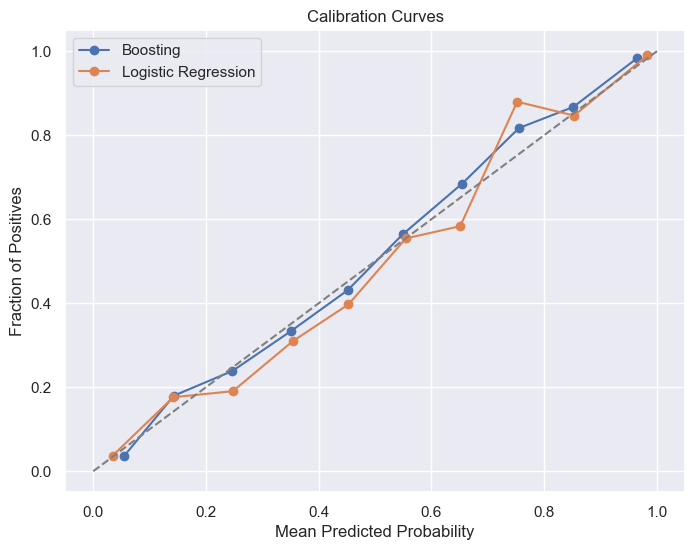

In [11]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

from sklearn.calibration import calibration_curve

prob_true_boost, prob_pred_boost = calibration_curve(y_test, y_pred_proba_boost, n_bins=10)

prob_true_lr, prob_pred_lr = calibration_curve(y_test, y_pred_proba_lr, n_bins=10)

plt.figure(figsize=(8, 6))

plt.plot(prob_pred_boost, prob_true_boost, marker='o', label='Boosting')

plt.plot(prob_pred_lr, prob_true_lr, marker='o', label='Logistic Regression')

plt.plot([0, 1], [0, 1], '--', color='gray')

plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curves')
plt.legend()
plt.show()

Теперь оценим важность признаков для градиентного бустинга.

**Задание:**
1. Поскольку базовая модель — дерево из `sklearn`, вычислите важность каждого признака для каждого дерева, используя атрибут `feature_importances_` у `DecisionTreeRegressor`.
2. Усредните значения важности по всем деревьям и нормализуйте их так, чтобы сумма была равна единице (убедитесь, что значения неотрицательны).
3. Дополните вашу реализацию бустинга, добавив метод `feature_importances_`, который будет возвращать усредненные и нормализованные важности признаков.

**Построение графиков:**
1. Постройте столбчатую диаграмму важности признаков для градиентного бустинга.
2. На соседнем графике изобразите важность признаков для логистической регрессии, используя модули весов.
3. Сравните графики и проанализируйте полученные результаты.

In [12]:
coeff_lr = np.abs(log_reg.coef_[0])
coeff_lr_norm = coeff_lr / coeff_lr.sum()

feat_imp_boost = best_boosting.feature_importances_
feat_imp_lr = coeff_lr_norm

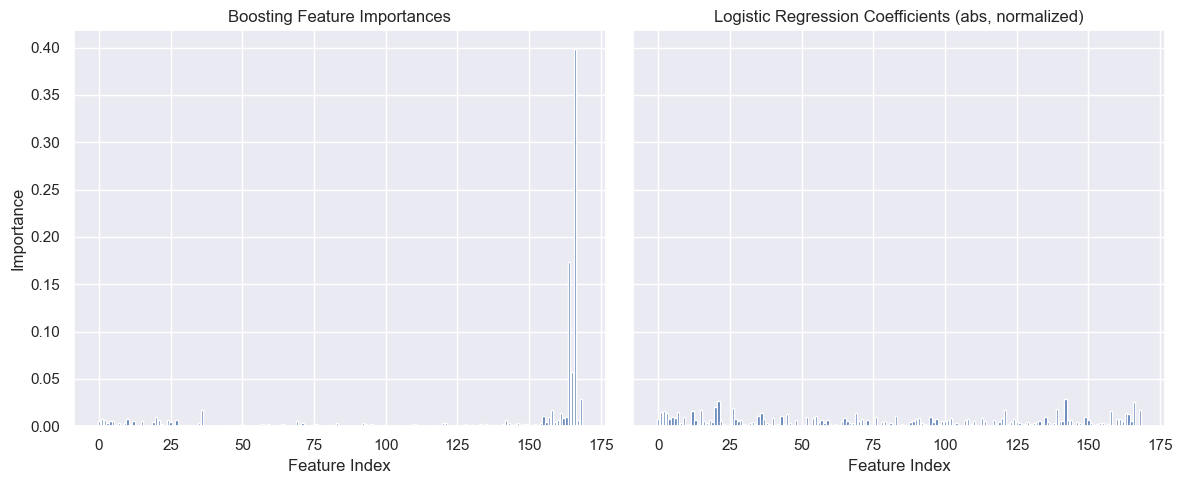

In [16]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

features = np.arange(len(feat_imp_boost))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), sharey=True)

axes[0].bar(features, feat_imp_boost)
axes[0].set_title("Boosting Feature Importances")
axes[0].set_xlabel("Feature Index")
axes[0].set_ylabel("Importance")

axes[1].bar(features, feat_imp_lr)
axes[1].set_title("Logistic Regression Coefficients (abs, normalized)")
axes[1].set_xlabel("Feature Index")

plt.tight_layout()
plt.show()

Обычно избыточные признаки могут негативно влиять на качество бустинга. Попробуйте следующее:

1. **Отфильтруйте неважные признаки:** Используйте построенную диаграмму важности признаков, чтобы отобрать наиболее незначительные признаки.
2. **Обучите модель повторно:** Обучите модель на основе оставшихся признаков с теми же гиперпараметрами.
3. **Оцените качество модели:** Сравните результаты новой модели с исходной. Улучшилось ли качество после отфильтровывания незначительных признаков?

In [20]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

threshold = np.percentile(feat_imp_boost, 80)

important_features = np.where(feat_imp_boost >= threshold)[0]

print(f"Chosen features (indexes): {important_features}")
print(f"Count of chosen features: {len(important_features)} from {len(feat_imp_boost)}")

Chosen features (indexes): [  0   1   2   3   4   5  10  12  15  19  20  21  24  25  27  36  69 121
 142 143 155 156 157 158 159 160 161 162 163 164 165 166 167 168]
Count of chosen features: 34 from 169


In [21]:
selected_features = important_features

x_train_reduced = x_train[:, selected_features]
x_valid_reduced = x_valid[:, selected_features]
x_test_reduced = x_test[:, selected_features]

print(f"The form of the training sample after filtering: {x_train_reduced.shape}")
print(f"The form of the validation sample after filtering: {x_valid_reduced.shape}")
print(f"The form of the test sample after filtering: {x_test_reduced.shape}")

The form of the training sample after filtering: (18825, 34)
The form of the validation sample after filtering: (2354, 34)
The form of the test sample after filtering: (2353, 34)


In [22]:
boosting_reduced = Boosting(
    base_model_params={
        "max_depth": best_params["max_depth"],
        "min_samples_leaf": best_params["min_samples_leaf"]
    },
    n_estimators=best_params["n_estimators"],
    learning_rate=best_params["learning_rate"],
    subsample=best_params["subsample"],
    early_stopping_rounds=10,
    plot=False
)

boosting_reduced.fit(x_train_reduced, y_train, x_valid_reduced, y_valid)

y_pred_proba_boost_reduced = boosting_reduced.predict_proba(x_test_reduced)[:, 1]

Iteration 1/140: Train Loss = 0.6411, Valid Loss = 0.6427
Iteration 2/140: Train Loss = 0.5959, Valid Loss = 0.5994
Iteration 3/140: Train Loss = 0.5575, Valid Loss = 0.5621
Iteration 4/140: Train Loss = 0.5247, Valid Loss = 0.5297
Iteration 5/140: Train Loss = 0.4968, Valid Loss = 0.5029
Iteration 6/140: Train Loss = 0.4717, Valid Loss = 0.4791
Iteration 7/140: Train Loss = 0.4502, Valid Loss = 0.4581
Iteration 8/140: Train Loss = 0.4317, Valid Loss = 0.4402
Iteration 9/140: Train Loss = 0.4149, Valid Loss = 0.4245
Iteration 10/140: Train Loss = 0.4001, Valid Loss = 0.4108
Iteration 11/140: Train Loss = 0.3870, Valid Loss = 0.3980
Iteration 12/140: Train Loss = 0.3754, Valid Loss = 0.3873
Iteration 13/140: Train Loss = 0.3650, Valid Loss = 0.3773
Iteration 14/140: Train Loss = 0.3554, Valid Loss = 0.3685
Iteration 15/140: Train Loss = 0.3467, Valid Loss = 0.3607
Iteration 16/140: Train Loss = 0.3389, Valid Loss = 0.3530
Iteration 17/140: Train Loss = 0.3320, Valid Loss = 0.3469
Iterat

In [23]:
from sklearn.metrics import roc_auc_score

roc_auc_original = best_boosting.score(x_test, y_test)

roc_auc_reduced = roc_auc_score(y_test, y_pred_proba_boost_reduced)

print(f"Original Boosting Test ROC-AUC: {roc_auc_original:.4f}")
print(f"Reduced Boosting Test ROC-AUC: {roc_auc_reduced:.4f}")

Original Boosting Test ROC-AUC: 0.9661
Reduced Boosting Test ROC-AUC: 0.9649


Качество модели стало незначительно хуже

## Задание 5 (бонус). Блендинговое [0.5 балла]

Реализуйте блендинг над вашей лучшей моделью и логистической регрессией. Улучшилось ли качество?

In [ ]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

## Задание 6 (бонус). Катбустовое [0.5 балла]

Запустите [CatBoost](https://catboost.ai/en/docs/concepts/python-quickstart) на наших данных, сравните с вашей реализацией. Где получилось лучше?

In [ ]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

Оставьте пожалуйста отзыв о курсе!

https://forms.gle/LajA3Xrps6u96Q5A8


Это очень важно. Благодаря обратной связи мы будем двигаться в сторону антиградиента)
